# Telecom Churn Case Study

In [2]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
telecom_df = pd.read_csv('telecom_churn_data.csv')
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
# Checking Shape of dataset
telecom_df.shape

(99999, 226)

In [4]:
#Getting the statistical details of dataset
telecom_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


#### In this case study, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

- Good Phase - Month 6 and 7
- Action Phase - Month 8
- Churn Phase - Month 9

# Derive New Features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Use your business understanding to derive features you think could be important indicators of churn.

In order to filter high value customers we need to derive a feature from the dataset capturing the average recharge amount in the good phase which is month 6 and 7. So, deriving average amount related feature from the dataset

In [5]:
amt_related_col = telecom_df.columns[telecom_df.columns.str.contains('amt')]
amt_related_col

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'last_day_rch_amt_6',
       'last_day_rch_amt_7', 'last_day_rch_amt_8', 'last_day_rch_amt_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [6]:
# Checking the null values

print("Percentage Missing Data \n")
100*telecom_df[amt_related_col].isnull().sum()/len(telecom_df)


Percentage Missing Data 



total_rech_amt_6       0.000000
total_rech_amt_7       0.000000
total_rech_amt_8       0.000000
total_rech_amt_9       0.000000
max_rech_amt_6         0.000000
max_rech_amt_7         0.000000
max_rech_amt_8         0.000000
max_rech_amt_9         0.000000
last_day_rch_amt_6     0.000000
last_day_rch_amt_7     0.000000
last_day_rch_amt_8     0.000000
last_day_rch_amt_9     0.000000
av_rech_amt_data_6    74.846748
av_rech_amt_data_7    74.428744
av_rech_amt_data_8    73.660737
av_rech_amt_data_9    74.077741
dtype: float64

`av_rech_amt_data` has nearly 75% of missing values. So, Consider that the user has not recharged any amount on data, replacing the null values in `average recharge amount on data` columns to 0

In [7]:
av_rech_cols = telecom_df.columns[telecom_df.columns.str.contains('av_rech_amt_data')]
av_rech_cols

Index(['av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [8]:
# Replacing nan values
telecom_df['av_rech_amt_data_6'] = telecom_df['av_rech_amt_data_6'].fillna(0)
telecom_df['av_rech_amt_data_7'] = telecom_df['av_rech_amt_data_7'].fillna(0)
telecom_df['av_rech_amt_data_8'] = telecom_df['av_rech_amt_data_8'].fillna(0)

In [9]:
telecom_df[av_rech_cols].isnull().sum()

av_rech_amt_data_6        0
av_rech_amt_data_7        0
av_rech_amt_data_8        0
av_rech_amt_data_9    74077
dtype: int64

In the given dataset we have column explaining total recharged data `total_rech_data`. This can be used for calculating the amount spend on data

In [10]:
rech_data = telecom_df.columns[telecom_df.columns.str.contains('total_rech_data')]
rech_data

Index(['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8',
       'total_rech_data_9'],
      dtype='object')

In [11]:
print("Percentage null values on recharge data")
100*telecom_df[rech_data].isnull().sum()/len(telecom_df)

Percentage null values on recharge data


total_rech_data_6    74.846748
total_rech_data_7    74.428744
total_rech_data_8    73.660737
total_rech_data_9    74.077741
dtype: float64

Nearly 75% of columns are null here. So, considering that there is no data recharged by the customer replacing the null values with 0

In [12]:
telecom_df['total_rech_data_6'] = telecom_df['total_rech_data_6'].fillna(0)
telecom_df['total_rech_data_7'] = telecom_df['total_rech_data_7'].fillna(0)
telecom_df['total_rech_data_8'] = telecom_df['total_rech_data_8'].fillna(0)

Deriving a new feature `total_amt_rech_data` using `av_rech_amt_data` and `total_rech_data`

- `total_amt_rech_data = av_rech_amt_data * total_rech_data`


In [14]:
telecom_df['total_amt_rech_data_6'] = telecom_df['av_rech_amt_data_6'] * telecom_df['total_rech_data_6']
telecom_df['total_amt_rech_data_7'] = telecom_df['av_rech_amt_data_7'] * telecom_df['total_rech_data_7']
telecom_df['total_amt_rech_data_8'] = telecom_df['av_rech_amt_data_8'] * telecom_df['total_rech_data_8']

In [15]:
telecom_df[['total_amt_rech_data_6', 'total_amt_rech_data_7', 'total_amt_rech_data_8']].isnull().sum()

total_amt_rech_data_6    0
total_amt_rech_data_7    0
total_amt_rech_data_8    0
dtype: int64

Calculating average amount spent by the user on good phase to filter high value customers. 

- Here total amount = Recharge amount spent on call + Recharge amount spent on Data
- Average amount in good phase = Total amount in month 6 + Total amount in month 7 / 2

In [16]:
# CALCCULATING TOTAL RECHARGE AMOUNT IN GOOD PHASE
telecom_df['total_rech_amt_good_phase'] = (telecom_df['total_rech_amt_6'] + telecom_df['total_amt_rech_data_6'] + telecom_df['total_rech_amt_7'] + telecom_df['total_amt_rech_data_7'])/2
telecom_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_data_6,total_amt_rech_data_7,total_amt_rech_data_8,total_rech_amt_good_phase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.4,0.0,101.20,3.58,252.0,252.0,252.0,559.0
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,NaN,1006,0.0,0.0,0.00,0.00,0.0,154.0,100.0,306.0
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,1.0,1103,0.0,0.0,4.17,0.00,0.0,0.0,0.0,241.5
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,NaN,2491,0.0,0.0,0.00,0.00,0.0,0.0,0.0,270.0
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,NaN,1526,0.0,0.0,0.00,0.00,56.0,0.0,0.0,301.0


In [17]:
# Checking null values
telecom_df['total_rech_amt_good_phase'].isnull().sum()

0

# Filter high-value customers

In [18]:
_70th_quantile = np.quantile(telecom_df['total_rech_amt_good_phase'], 0.7)
high_value_customers = telecom_df[telecom_df['total_rech_amt_good_phase'] >= _70th_quantile]
high_value_customers.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_amt_rech_data_6,total_amt_rech_data_7,total_amt_rech_data_8,total_rech_amt_good_phase
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,NaN,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,559.0
7,7000701601,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,1069.180,...,NaN,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1185.0
8,7001524846,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,378.721,...,NaN,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,696.0
21,7002124215,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,514.453,...,NaN,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,640.0
23,7000887461,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,74.350,...,1.0,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,583.0


In [19]:
# Seeing the shape of high value customers
high_value_customers.shape

(30001, 230)

As mentioned, we have nearly 29.9K rows as high value customers

# Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

- total_ic_mou_9
- total_og_mou_9
- vol_2g_mb_9
- vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [20]:
# Creating the target variable churn

churn_phase_cols = ['total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9']

In [21]:
high_value_customers[churn_phase_cols].describe()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
count,30001.000000,30001.000000,30001.000000,30001.000000
mean,264.901497,500.869219,91.435910,349.513848
std,358.290694,666.902007,282.370006,947.079372
min,0.000000,0.000000,0.000000,0.000000
25%,50.480000,47.640000,0.000000,0.000000
50%,157.980000,284.940000,0.000000,0.000000
75%,343.540000,698.680000,38.000000,320.610000
max,7785.730000,11517.730000,8993.950000,39221.270000


In [22]:
# Checking null values
high_value_customers[churn_phase_cols].isnull().sum()

total_ic_mou_9    0
total_og_mou_9    0
vol_2g_mb_9       0
vol_3g_mb_9       0
dtype: int64

In [23]:
# Creating a new variable churn
# if 'total_ic_mou_9', 'total_og_mou_9', 'vol_2g_mb_9', 'vol_3g_mb_9' are 0, then churn = 1, else 0

high_value_customers['churn'] = 0 # initially setting all churn to 0
high_value_customers.loc[(high_value_customers['total_ic_mou_9'] == 0) &\
                     (high_value_customers['total_og_mou_9'] == 0) &\
                     (high_value_customers['vol_2g_mb_9'] == 0) &\
                     (high_value_customers['vol_3g_mb_9'] == 0)
                    , 'churn'] = 1

In [24]:
# Checking the number of churn customers
high_value_customers.churn.sum()

2441

In [25]:
# Checking the percentage of churn
100*high_value_customers.churn.sum()/len(high_value_customers)

8.136395453484884

`Inference` Nearly 8.14% of high value customers are churning in churn phase

# Exploratory Data Analysis

In [26]:
# Dropping irrelavant columns

cols_to_drop = ['circle_id', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8']

high_value_customers.drop(cols_to_drop, axis = 1, inplace = True)

In [27]:
cols_with_less_uniqueness = []
for i in high_value_customers.columns:
    if len(high_value_customers[i].unique()) == 2:
        cols_with_less_uniqueness.append(i)

In [28]:
high_value_customers[cols_with_less_uniqueness].describe()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,churn
count,29777.0,29777.0,29777.0,29456.0,29464.0,28827.0,28100.0,29456.0,29464.0,28827.0,28100.0,30001.000000
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.081364
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.273398
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.000000


It is seen that some of the columns listed above are having only values 0 in it. So, dropping those columns.

In [29]:
cols_to_drop = ['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7',
               'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']

In [30]:
high_value_customers.drop(cols_to_drop, axis = 1, inplace = True)

In [31]:
high_value_customers.shape

(30001, 218)

In [32]:
# Dropping all columns having _9 
cols_with_9 = high_value_customers.columns[high_value_customers.columns.str.contains("_9")]
high_value_customers.drop(cols_with_9, axis = 1, inplace = True)

In [33]:
high_value_customers.shape

(30001, 164)

In [34]:
# Converting remaining Date columns to datetime

date_cols = high_value_customers.columns[high_value_customers.columns.str.contains('date')]
date_cols

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [35]:
for col in date_cols:
    high_value_customers[col] = pd.to_datetime(high_value_customers[col])

In [36]:
high_value_customers[date_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date_of_last_rech_6       29928 non-null  datetime64[ns]
 1   date_of_last_rech_7       29903 non-null  datetime64[ns]
 2   date_of_last_rech_8       29418 non-null  datetime64[ns]
 3   date_of_last_rech_data_6  16756 non-null  datetime64[ns]
 4   date_of_last_rech_data_7  17057 non-null  datetime64[ns]
 5   date_of_last_rech_data_8  15953 non-null  datetime64[ns]
dtypes: datetime64[ns](6)
memory usage: 1.6 MB


# Univariate analysis

In [37]:
# Checking recharge related columns

rech_data_cols = high_value_customers.columns[high_value_customers.columns.str.contains('rech_amt|amt_rech|rech_num|rech_data|rch_amt')]
rech_data_cols

Index(['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8',
       'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7',
       'max_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7',
       'av_rech_amt_data_8', 'total_amt_rech_data_6', 'total_amt_rech_data_7',
       'total_amt_rech_data_8', 'total_rech_amt_good_phase'],
      dtype='object')

In [38]:
# Checking null values
100 * high_value_customers[rech_data_cols].isnull().sum()/len(high_value_customers)

total_rech_num_6              0.000000
total_rech_num_7              0.000000
total_rech_num_8              0.000000
total_rech_amt_6              0.000000
total_rech_amt_7              0.000000
total_rech_amt_8              0.000000
max_rech_amt_6                0.000000
max_rech_amt_7                0.000000
max_rech_amt_8                0.000000
last_day_rch_amt_6            0.000000
last_day_rch_amt_7            0.000000
last_day_rch_amt_8            0.000000
date_of_last_rech_data_6     44.148528
date_of_last_rech_data_7     43.145228
date_of_last_rech_data_8     46.825106
total_rech_data_6             0.000000
total_rech_data_7             0.000000
total_rech_data_8             0.000000
max_rech_data_6              44.148528
max_rech_data_7              43.145228
max_rech_data_8              46.825106
av_rech_amt_data_6            0.000000
av_rech_amt_data_7            0.000000
av_rech_amt_data_8            0.000000
total_amt_rech_data_6         0.000000
total_amt_rech_data_7    

In [39]:
# Filling null values in maximum data recharge to 0
high_value_customers[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']] = high_value_customers[['max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8']].fillna(0)

In [40]:
def draw_box(feature):
    plt.figure(figsize = (18,6))
    plt.subplot(1,3,1)
    var = feature+"_6"
    sns.boxplot(data=high_value_customers, x='churn',  y= var, hue = 'churn', showfliers= False) # Hiding Outliers
    plt.legend(bbox_to_anchor = (0.75,1))
    plt.subplot(1,3,2)
    var = feature+"_7"
    sns.boxplot(data=high_value_customers, x='churn',  y= var, hue = 'churn', showfliers= False)
    plt.legend(bbox_to_anchor = (0.75,1))
    plt.subplot(1,3,3)
    var = feature+"_8"
    sns.boxplot(data=high_value_customers, x='churn',  y= var, hue = 'churn', showfliers= False)
    plt.legend(bbox_to_anchor = (1,1))
    plt.show()

### Total Amount recharged - total_rech_amt

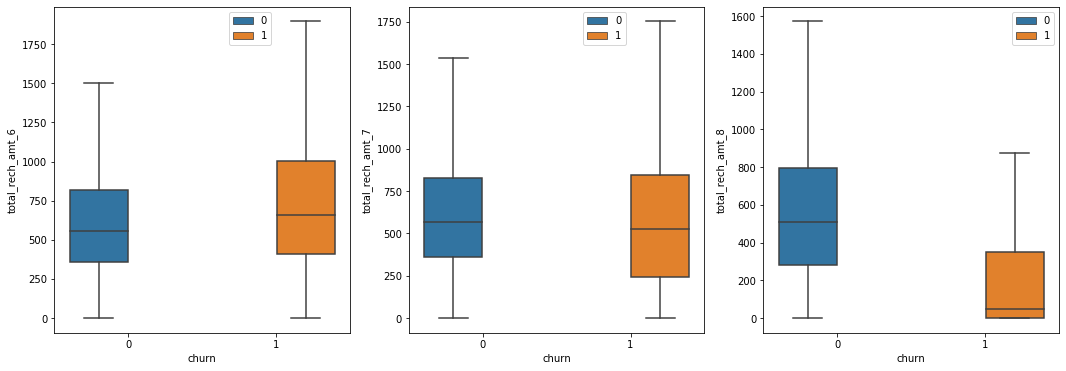

In [40]:
draw_box('total_rech_amt')

`Inference` : It is seen from the plot that the high value customers in `ACTIVE PHASE` who are all churned is having a very low mean value of total amount recharged. This shows that the customers who are getting churned is not spending amount on recharge as compared to good phase.

### Maximum Recharge amount - max_rech_amt

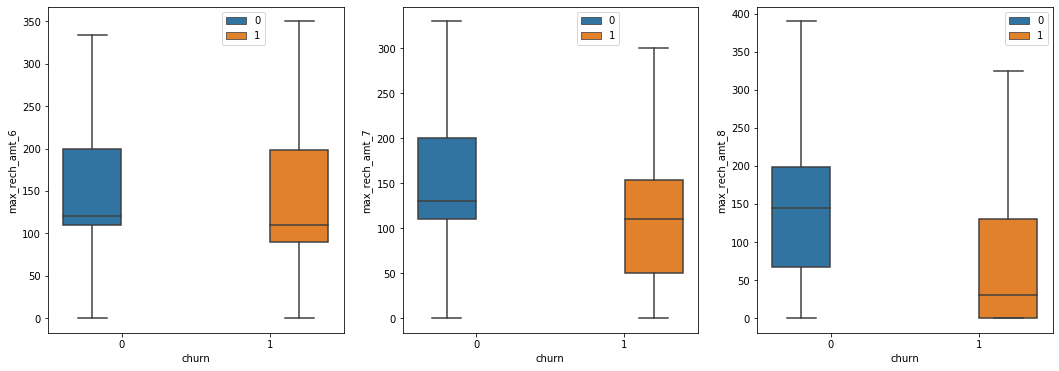

In [41]:
draw_box('max_rech_amt')

`Inference` : It is seen from the plot that the high value customers in `ACTIVE PHASE` who are all churned is having a very low mean value of maximum amount recharged. This shows that the customers who are getting churned is not spending amount on recharge as compared to good phase.

### Average Recharge Amount on Data - av_rech_amt_data

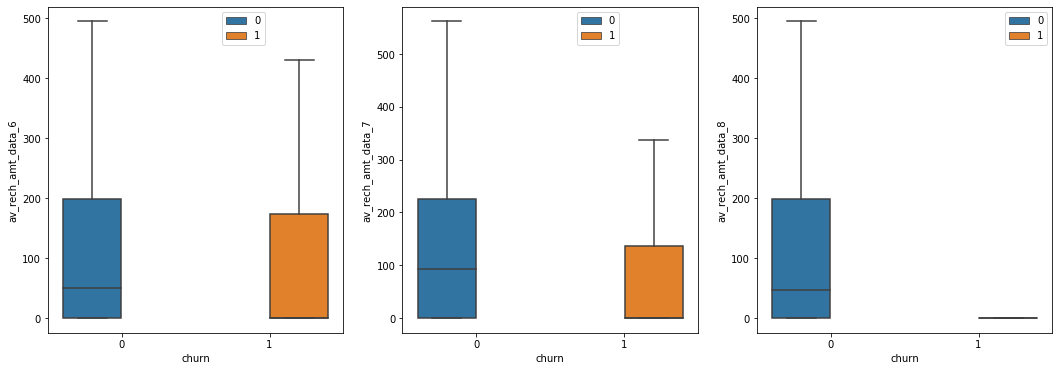

In [42]:
draw_box('av_rech_amt_data')

`Inference` It is seen that the mean amount spent on data is nearly 0 in active phase for customers who are all getting churned

### Total amount recharged on Data - total_amt_rech_data

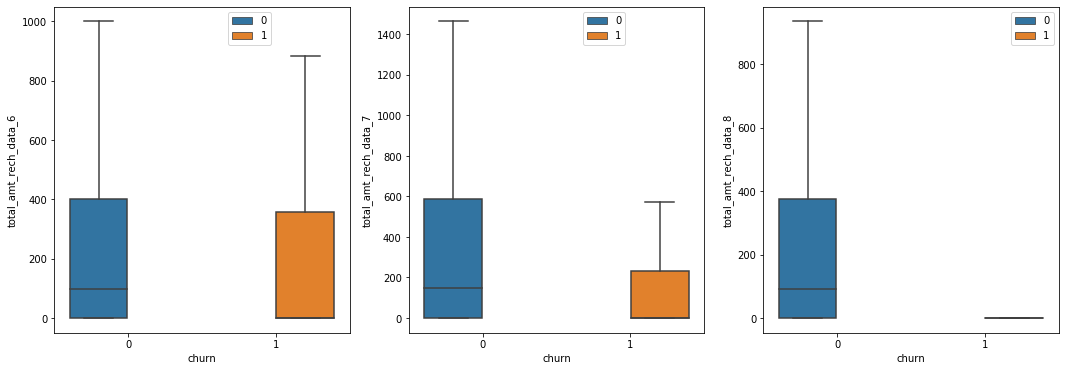

In [43]:
draw_box('total_amt_rech_data')

`Inference` It is seen that the total amount spent on data is nearly 0 in active phase for customers who are all getting churned. This indiactes that the data used by the customers is almost 0 in active phase for the customers to be churned.

### Total Number of Recharges - total_rech_num

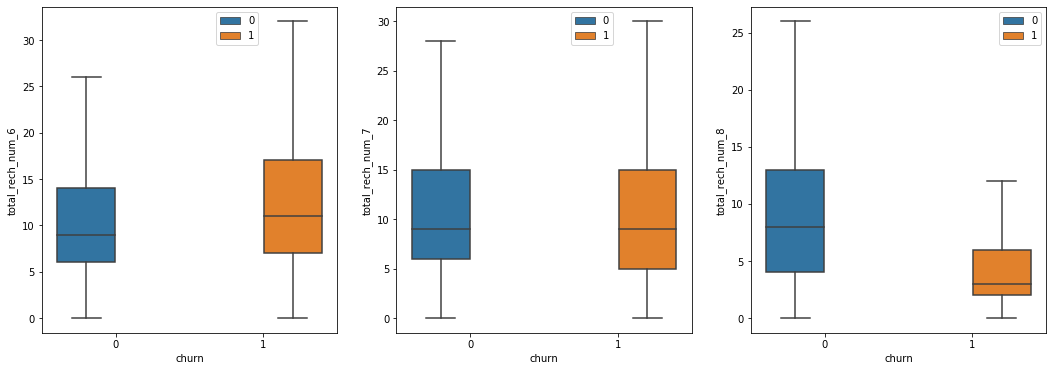

In [44]:
draw_box('total_rech_num')

`Inference` : This indicates that the total number of recharges made by the customers in `ACTIVE PHASE` is too low when compared to Good Phase. 

### Maximum Recharge on Data - max_rech_data

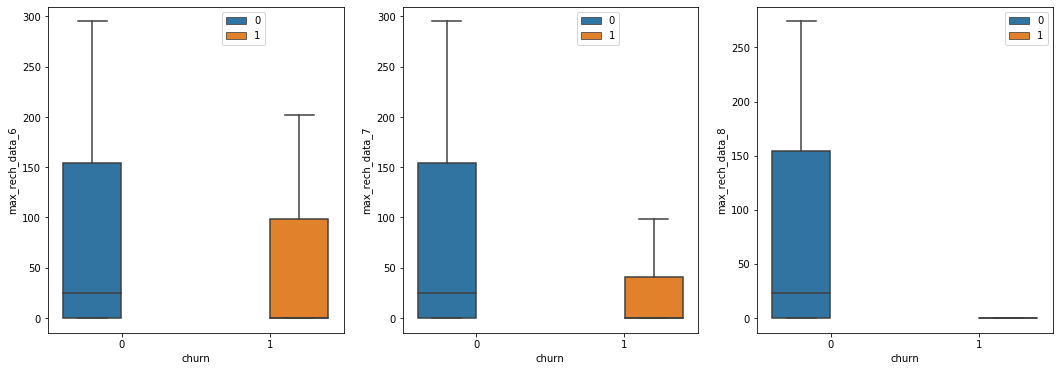

In [45]:
draw_box('max_rech_data')

`Inference` : This shows that the maximum recharge on data by the cutomers who are churned in `ACTIVE PHASE` is also went down.

### Last Day recharge amount last_day_rch_amt

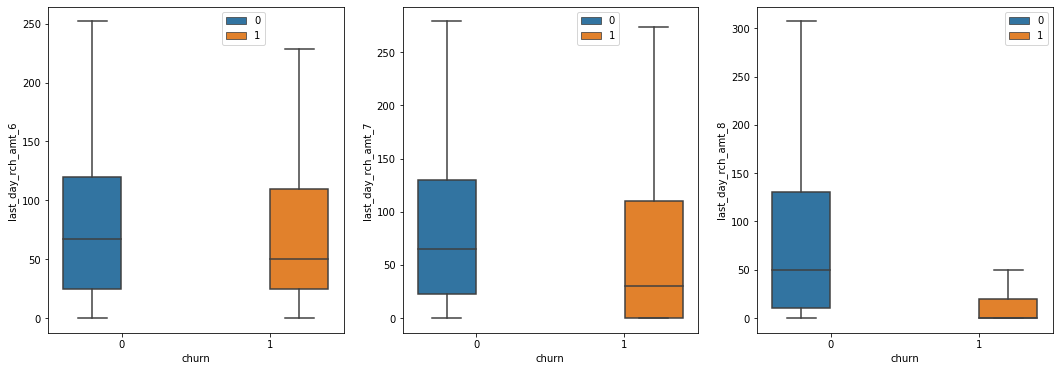

In [46]:
draw_box("last_day_rch_amt")

## Analysis on 2g and 3g variables

In [41]:
_2g_3g_cols = high_value_customers.columns[high_value_customers.columns.str.contains('2g|3g')]
_2g_3g_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'sep_vbc_3g'],
      dtype='object')

In [43]:
# Here volume based cost variables have 6 as jun 7 as jul 8 as aug and 9 as sep. 
#So dropping sep columns and renaming remaining columns.

sep_cols = high_value_customers.columns[high_value_customers.columns.str.contains('sep')]
high_value_customers.drop(sep_cols, axis = 1, inplace = True)

In [44]:
high_value_customers.rename(columns = {"jun_vbc_3g": "vbc_3g_6", "jul_vbc_3g": "vbc_3g_7", "aug_vbc_3g": "vbc_3g_8"}, inplace = True)

In [45]:
_2g_3g_cols = high_value_customers.columns[high_value_customers.columns.str.contains('2g|3g')]
_2g_3g_cols

Index(['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
       'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'vol_2g_mb_6',
       'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7',
       'vol_3g_mb_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6',
       'arpu_2g_7', 'arpu_2g_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

In [46]:
# Checking null values in 2g and 3g related data
100* high_value_customers[_2g_3g_cols].isnull().sum()/len(high_value_customers)

count_rech_2g_6    44.148528
count_rech_2g_7    43.145228
count_rech_2g_8    46.825106
count_rech_3g_6    44.148528
count_rech_3g_7    43.145228
count_rech_3g_8    46.825106
vol_2g_mb_6         0.000000
vol_2g_mb_7         0.000000
vol_2g_mb_8         0.000000
vol_3g_mb_6         0.000000
vol_3g_mb_7         0.000000
vol_3g_mb_8         0.000000
arpu_3g_6          44.148528
arpu_3g_7          43.145228
arpu_3g_8          46.825106
arpu_2g_6          44.148528
arpu_2g_7          43.145228
arpu_2g_8          46.825106
monthly_2g_6        0.000000
monthly_2g_7        0.000000
monthly_2g_8        0.000000
sachet_2g_6         0.000000
sachet_2g_7         0.000000
sachet_2g_8         0.000000
monthly_3g_6        0.000000
monthly_3g_7        0.000000
monthly_3g_8        0.000000
sachet_3g_6         0.000000
sachet_3g_7         0.000000
sachet_3g_8         0.000000
vbc_3g_8            0.000000
vbc_3g_7            0.000000
vbc_3g_6            0.000000
dtype: float64

`Inference` : Since average revenue per user on 2g and 3g data has nearly 45% of null values and also the average revenue per user is also captured by total_rech_data, we can drop the arpu columns.
Also, count of recharge on 2g and 3g data is also been captured by total recharge data we can also drop count of recharge columns.

In [47]:
_2g_3g_drop_cols = ['count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8',
                   'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8',
                   'arpu_3g_6', "arpu_3g_7", 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8']
high_value_customers.drop(_2g_3g_drop_cols, axis = 1, inplace = True)

In [48]:
_2g_3g_cols = high_value_customers.columns[high_value_customers.columns.str.contains('2g|3g')]
_2g_3g_cols

Index(['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6',
       'vol_3g_mb_7', 'vol_3g_mb_8', 'monthly_2g_6', 'monthly_2g_7',
       'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8',
       'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6',
       'sachet_3g_7', 'sachet_3g_8', 'vbc_3g_8', 'vbc_3g_7', 'vbc_3g_6'],
      dtype='object')

### Volume of 2g Data used - vol_2g_mb

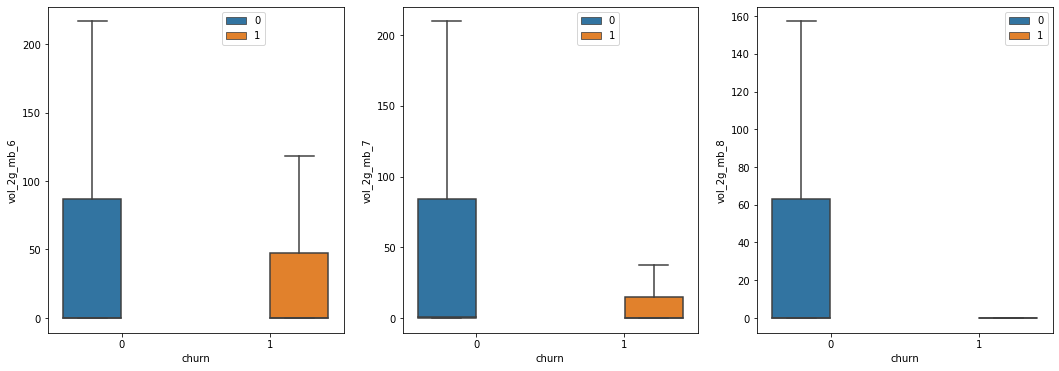

In [49]:
# Using bar plots to visualize
draw_box('vol_2g_mb')

`Inference` : It is seen that in `ACTIVE PHASE` the customers who are getting churned is not using any 2g data on average

### Volume of 3g data used - vol_3g_mb

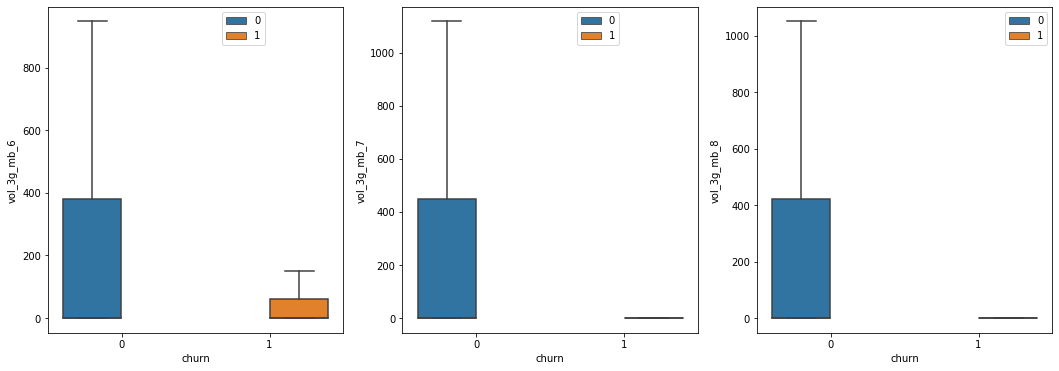

In [55]:
draw_box("vol_3g_mb")

`Inference` : It is seen that in `ACTIVE PHASE` the customers who are getting churned is not using any 3g data on average.
There might be the case that the churning customers might be from the remote places where there is no 2g or 3g data connections available.

### Monthly 2g data - monthly_2g

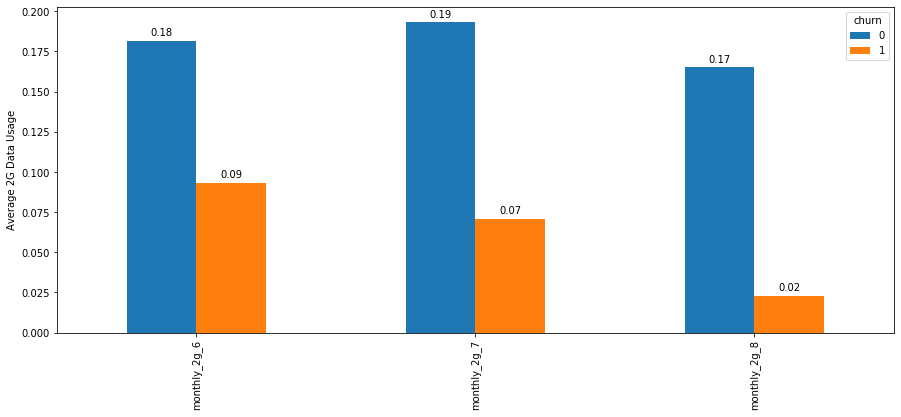

In [50]:
col_list = high_value_customers.columns[high_value_customers.columns.str.contains('monthly_2g')]
plt1 = pd.pivot_table(data = high_value_customers, values = col_list, index = 'churn', aggfunc = 'mean').T.plot.bar(figsize = (15,6))
for bar in plt1.patches:
        plt1.annotate("{}".format(format(bar.get_height(), '.2f')), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt1.set_ylabel("Average 2G Data Usage")
plt.show()

`Inference` : It is seen that the average usage of monthly 2G data is reducing from good phase to active phase.

### Monthly 3G Data - monthly_3g

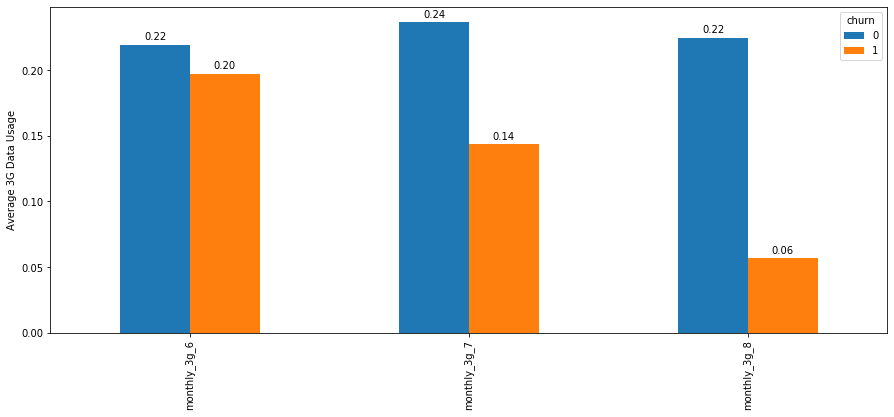

In [51]:
col_list = high_value_customers.columns[high_value_customers.columns.str.contains('monthly_3g')]
plt1 = pd.pivot_table(data = high_value_customers, values = col_list, index = 'churn', aggfunc = 'mean').T.plot.bar(figsize = (15,6))
for bar in plt1.patches:
        plt1.annotate("{}".format(format(bar.get_height(), '.2f')), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt1.set_ylabel("Average 3G Data Usage")
plt.show()

`Inference` It is seen that in good pahse the 3G monthly data usage of both churned and non churn customers are approximately nearer whereas in the active phase there is a hughe drop in monthly 3G data usage with customers who are all getting churned

### Sachet 2G data usage - sachet_2g

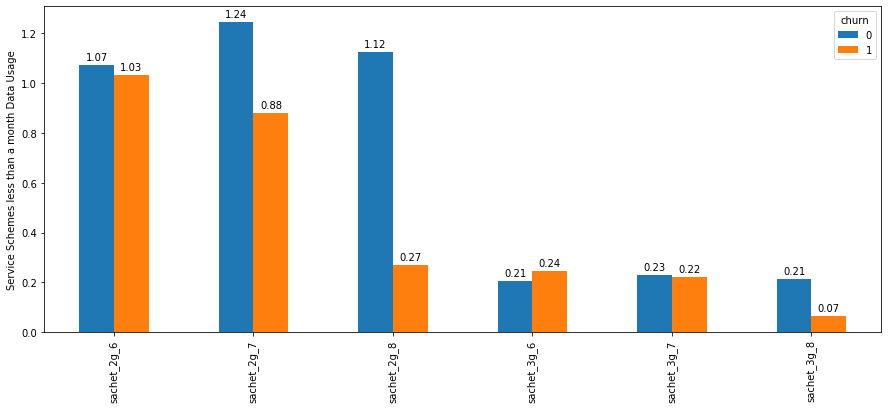

In [52]:
col_list = high_value_customers.columns[high_value_customers.columns.str.contains('sachet_2g|sachet_3g')]
plt1 = pd.pivot_table(data = high_value_customers, values = col_list, index = 'churn', aggfunc = 'mean').T.plot.bar(figsize = (15,6))
for bar in plt1.patches:
        plt1.annotate("{}".format(format(bar.get_height(), '.2f')), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt1.set_ylabel("Service Schemes less than a month Data Usage")
plt.show()

`Inference`: The above graph shows that the Service Schemes with validity less than a month also falls down for churn customers in Active phase. We can see here that the 3G Sachet services in the month of June is used more by churn customers than non churn customers.

### Volume based cost - vbc

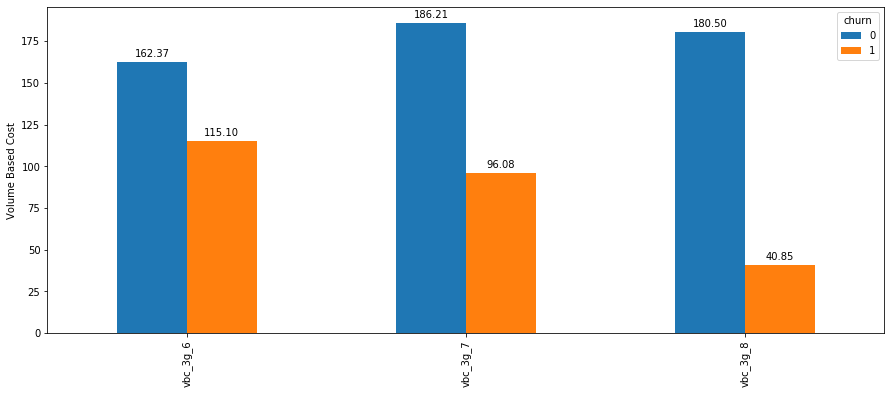

In [53]:
col_list = high_value_customers.columns[high_value_customers.columns.str.contains('vbc_2g|vbc_3g')]
plt1 = pd.pivot_table(data = high_value_customers, values = col_list, index = 'churn', aggfunc = 'mean').T.plot.bar(figsize = (15,6))
for bar in plt1.patches:
        plt1.annotate("{}".format(format(bar.get_height(), '.2f')), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt1.set_ylabel("Volume Based Cost")
plt.show()

`Inference` : It is seen from the above graph that the volume usage based cost of 3G data also falls in active phase.

## Minutes of Usage - Columns with *mou

In [54]:
mou_cols = high_value_customers.columns[high_value_customers.columns.str.contains('mou')]
mou_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8',
       'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8',
       'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7',
       'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8',
       'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6',
       'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mo

In [55]:
# Checking null values percentage
pd.DataFrame(100*high_value_customers[mou_cols].isnull().sum()/len(high_value_customers)).sort_values(by=0, ascending = False)

,0
isd_ic_mou_8,3.913203
loc_ic_t2t_mou_8,3.913203
loc_ic_t2m_mou_8,3.913203
std_og_t2t_mou_8,3.913203
loc_og_t2c_mou_8,3.913203
...,...
total_ic_mou_6,0.000000
total_ic_mou_7,0.000000
total_ic_mou_8,0.000000
total_og_mou_6,0.000000


In [56]:
#Here the maximum percent of null values is 3.9%. 
##Thus replacing the null values with 0 considering that no such calls have been made by the customers.
high_value_customers[mou_cols] = high_value_customers[mou_cols].fillna(0)

In [57]:
pd.DataFrame(100*high_value_customers[mou_cols].isnull().sum()/len(high_value_customers)).sort_values(by=0, ascending = False)

,0
onnet_mou_6,0.0
isd_og_mou_8,0.0
loc_ic_mou_8,0.0
loc_ic_mou_7,0.0
loc_ic_mou_6,0.0
...,...
loc_og_mou_8,0.0
loc_og_mou_7,0.0
loc_og_mou_6,0.0
loc_og_t2c_mou_8,0.0


## Analysis on OG MOU Columns

In [58]:
# Fetching OG MOU related columns
og_mou = high_value_customers.columns[high_value_customers.columns.str.contains('_og.*_mou')]
og_mou

Index(['roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7',
       'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7',
       'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7',
       'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7',
       'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

In [59]:
#Consolidating the columns excluding the month, we have 13 below columns
month_6_mou_og_cols = high_value_customers.columns[high_value_customers.columns.str.contains('_og.*_mou.*6')]
print(month_6_mou_og_cols)
print(len(month_6_mou_og_cols))

Index(['roam_og_mou_6', 'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6',
       'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6',
       'std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6', 'isd_og_mou_6', 'spl_og_mou_6', 'total_og_mou_6'],
      dtype='object')
13


- Here we have 13 columns for every month related to OG MOU.


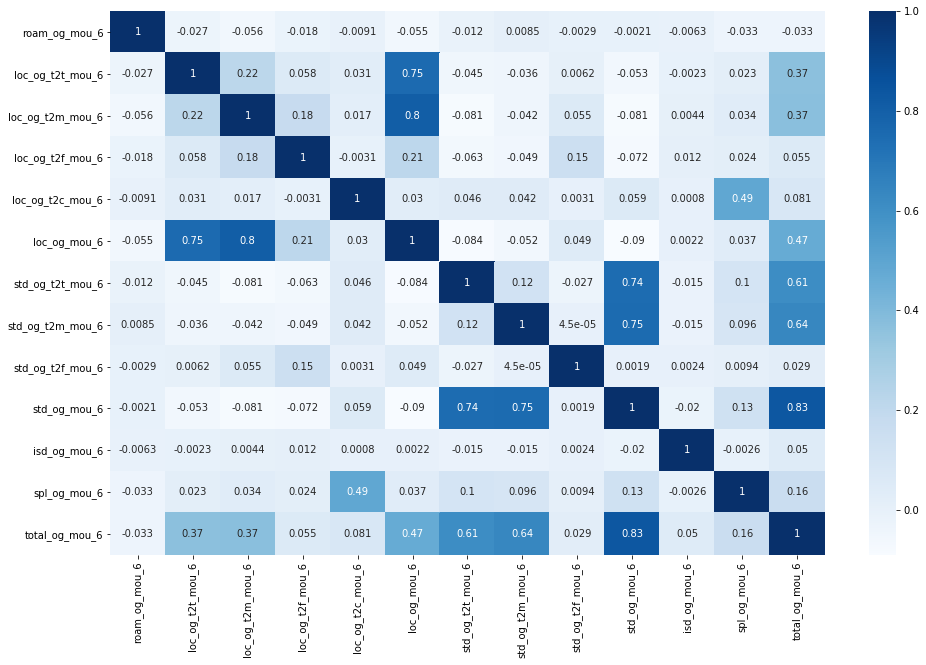

In [60]:
plt.figure(figsize = (16,10))
sns.heatmap(data = high_value_customers[month_6_mou_og_cols].corr(), annot = True, cmap = "Blues")
plt.show()

`Inference` We can see in the above plot that the columns `total_og_mou_6` , `std_og_mou_6` and `loc_og_mou_6` is having high correlation. Also, there are some other columns showing loc_og_mou and std_og_mou.

- Let us Find the correlation between those columns

#### loc_og_mou

In [61]:
og_mou_6_cols = high_value_customers.columns[high_value_customers.columns.str.contains('loc_og.*mou.*6')]
og_mou_6_cols

Index(['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_mou_6'],
      dtype='object')

In [62]:
temp_df = high_value_customers[og_mou_6_cols]
temp_df['total_loc_calls'] = high_value_customers['loc_og_t2t_mou_6'] + \
                             high_value_customers['loc_og_t2m_mou_6'] + \
                             high_value_customers['loc_og_t2c_mou_6'] + \
                             high_value_customers['loc_og_t2f_mou_6']
temp_df

,loc_og_t2t_mou_6,loc_og_t2m_mou_6,loc_og_t2f_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,total_loc_calls
0,0.00,0.00,0.00,0.00,0.00,0.00
7,51.39,308.63,62.13,0.00,422.16,422.15
8,297.13,80.96,0.00,0.00,378.09,378.09
21,4.48,91.81,0.75,0.00,97.04,97.04
23,48.96,82.94,0.00,0.00,131.91,131.90
...,...,...,...,...,...,...
99981,72.53,52.21,0.00,3.91,124.74,128.65
99984,423.99,17.96,0.00,17.04,441.96,458.99
99986,709.21,574.93,16.28,15.96,1300.43,1316.38
99988,170.28,137.83,0.00,0.00,308.11,308.11


In [63]:
temp_df[['loc_og_mou_6', 'total_loc_calls']].describe()

,loc_og_mou_6,total_loc_calls
count,30001.000000,30001.000000
mean,254.080388,255.647268
std,378.339061,378.577703
min,0.000000,0.000000
25%,32.260000,34.020000
50%,124.540000,126.200000
75%,332.090000,333.440000
max,10643.380000,10645.270000


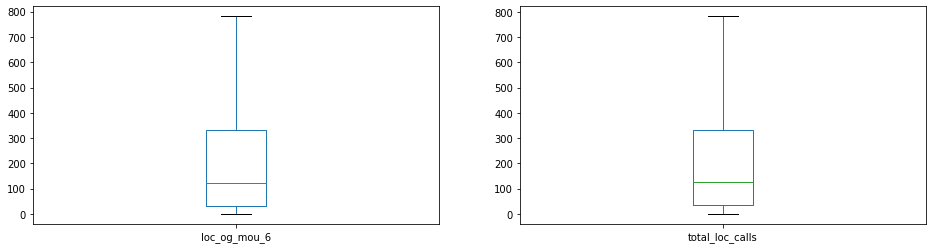

In [64]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
temp_df.loc_og_mou_6.plot.box(showfliers = False)
plt.subplot(1,2,2)
temp_df.total_loc_calls.plot.box(showfliers = False)
plt.show()

`Inference` It is seen from the above df that `loc_og_mou_6` = `loc_og_t2t_mou_6 + loc_og_t2m_mou_6 + loc_og_t2f_mou_6 + loc_og_t2c_mou_6`

#### std_og_mou

In [65]:
og_mou_6_cols = high_value_customers.columns[high_value_customers.columns.str.contains('std_og.*mou.*6')]
og_mou_6_cols

Index(['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6',
       'std_og_mou_6'],
      dtype='object')

In [66]:
temp_df = high_value_customers[og_mou_6_cols]
temp_df['total_std_calls'] = high_value_customers['std_og_t2t_mou_6'] + \
                             high_value_customers['std_og_t2m_mou_6'] + \
                             high_value_customers['std_og_t2f_mou_6']
temp_df

,std_og_t2t_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,std_og_mou_6,total_std_calls
0,0.00,0.00,0.00,0.00,0.00
7,4.30,49.89,6.66,60.86,60.85
8,116.56,13.69,0.00,130.26,130.25
21,97.93,665.36,0.00,763.29,763.29
23,0.00,2.36,0.00,2.36,2.36
...,...,...,...,...,...
99981,6.15,0.00,0.00,6.15,6.15
99984,0.00,0.03,0.00,0.03,0.03
99986,97.51,186.88,0.00,284.39,284.39
99988,29.61,38.04,0.00,67.66,67.65


In [73]:
temp_df[['std_og_mou_6', 'total_std_calls']].describe()

,std_og_mou_6,total_std_calls
count,30001.000000,30001.000000
mean,347.125955,347.122232
std,608.629048,608.627442
min,0.000000,0.000000
25%,0.380000,0.380000
50%,45.130000,45.120000
75%,465.390000,465.390000
max,8432.990000,8432.990000


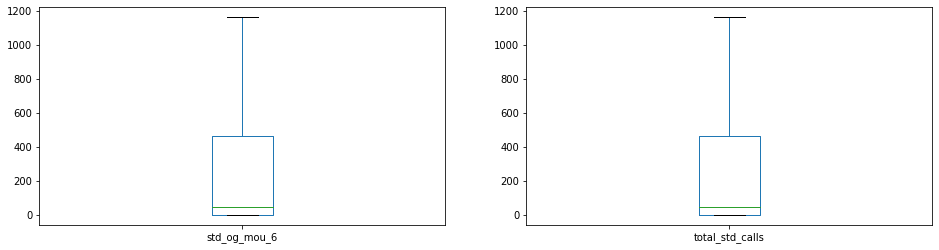

In [67]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
temp_df.std_og_mou_6.plot.box(showfliers = False)
plt.subplot(1,2,2)
temp_df.total_std_calls.plot.box(showfliers = False)
plt.show()

`Inference` It is seen from the above df that `std_og_mou_6` = `std_og_t2t_mou_6 + std_og_t2m_mou_6 + std_og_t2f_mou_6`

#### total_og_mou_6

In [68]:
og_mou_6 = high_value_customers.columns[high_value_customers.columns.str.contains("og_mou_6|og_others_6")]
og_mou_6

Index(['roam_og_mou_6', 'loc_og_mou_6', 'std_og_mou_6', 'isd_og_mou_6',
       'spl_og_mou_6', 'og_others_6', 'total_og_mou_6'],
      dtype='object')

In [69]:
# Checking null values in og and ic others
og_ic_others = high_value_customers.columns[high_value_customers.columns.str.contains("others")]
pd.DataFrame(100*high_value_customers[og_ic_others].isnull().sum()/len(high_value_customers))

,0
og_others_6,1.816606
og_others_7,1.789940
og_others_8,3.913203
ic_others_6,1.816606
ic_others_7,1.789940
ic_others_8,3.913203


In [70]:
# Filling with 0 considering no og and ic made by customers
high_value_customers[og_ic_others] = high_value_customers[og_ic_others].fillna(0)

In [71]:
high_value_customers[og_mou_6].isnull().sum()

roam_og_mou_6     0
loc_og_mou_6      0
std_og_mou_6      0
isd_og_mou_6      0
spl_og_mou_6      0
og_others_6       0
total_og_mou_6    0
dtype: int64

In [72]:
temp_df = high_value_customers[og_mou_6]
temp_df['total_og_mou_calculated_6'] = high_value_customers['roam_og_mou_6'] + \
                             high_value_customers['loc_og_mou_6'] + \
                             high_value_customers['std_og_mou_6'] + \
                             high_value_customers['isd_og_mou_6'] + \
                             high_value_customers['spl_og_mou_6'] + \
                             high_value_customers['og_others_6']
temp_df

,roam_og_mou_6,loc_og_mou_6,std_og_mou_6,isd_og_mou_6,spl_og_mou_6,og_others_6,total_og_mou_6,total_og_mou_calculated_6
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00
7,23.74,422.16,60.86,0.0,4.50,0.00,487.53,511.26
8,0.00,378.09,130.26,0.0,0.00,0.00,508.36,508.35
21,0.00,97.04,763.29,0.0,0.00,0.00,860.34,860.33
23,0.00,131.91,2.36,0.0,0.10,0.00,134.38,134.37
...,...,...,...,...,...,...,...,...
99981,0.00,124.74,6.15,0.0,3.91,0.00,134.81,134.80
99984,0.00,441.96,0.03,0.0,21.51,1.06,464.58,464.56
99986,0.00,1300.43,284.39,0.0,15.96,0.00,1600.79,1600.78
99988,0.00,308.11,67.66,0.0,0.00,0.00,375.78,375.77


In [73]:
temp_df[['total_og_mou_6', 'total_og_mou_calculated_6']].describe()

,total_og_mou_6,total_og_mou_calculated_6
count,30001.000000,30001.000000
mean,609.866251,636.428778
std,690.873430,696.770630
min,0.000000,0.000000
25%,116.580000,140.150000
50%,410.630000,446.280000
75%,858.760000,890.930000
max,10674.030000,10674.020000


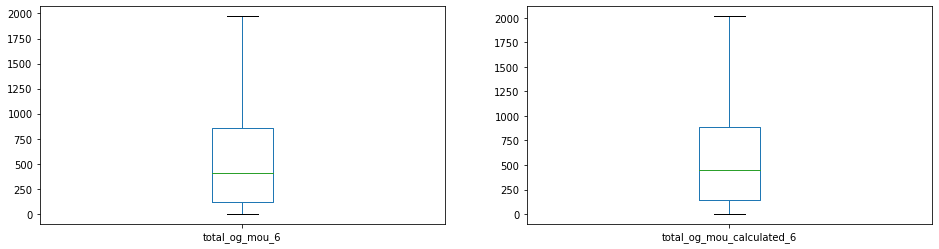

In [74]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
temp_df.total_og_mou_6.plot.box(showfliers = False)
plt.subplot(1,2,2)
temp_df.total_og_mou_calculated_6.plot.box(showfliers = False)
plt.show()

`Inference` : Here `total_og_mou_6` approximately equal to `roam_og_mou_6 + loc_og_mou_6 + std_og_mou_6 + isd_og_mou_6 + spl_og_mou_6+ og_others_6`

- Upon analysing we see that the columns `total_og_mou , loc_og_mou and std_og_mou` can be dropped since it is explained by combination of other columns.

In [75]:
cols_to_drop = high_value_customers.columns[high_value_customers.columns.str.contains("total_og_mou|loc_og_mou|std_og_mou")]
cols_to_drop

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

## Analysis on IC MOU Columns

In [76]:
# Fetching OG MOU related columns
ic_mou = high_value_customers.columns[high_value_customers.columns.str.contains('_ic.*_mou')]
ic_mou

Index(['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6',
       'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7',
       'loc_ic_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7',
       'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7',
       'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8', 'spl_ic_mou_6',
       'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8'],
      dtype='object')

In [77]:
#Consolidating the columns excluding the month, we have 13 below columns
month_6_mou_ic_cols = high_value_customers.columns[high_value_customers.columns.str.contains('_ic.*_mou.*6')]
print(month_6_mou_ic_cols)
print(len(month_6_mou_ic_cols))

Index(['roam_ic_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'loc_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6',
       'total_ic_mou_6', 'spl_ic_mou_6', 'isd_ic_mou_6'],
      dtype='object')
12


- Here we have 13 columns for every month related to OG MOU.


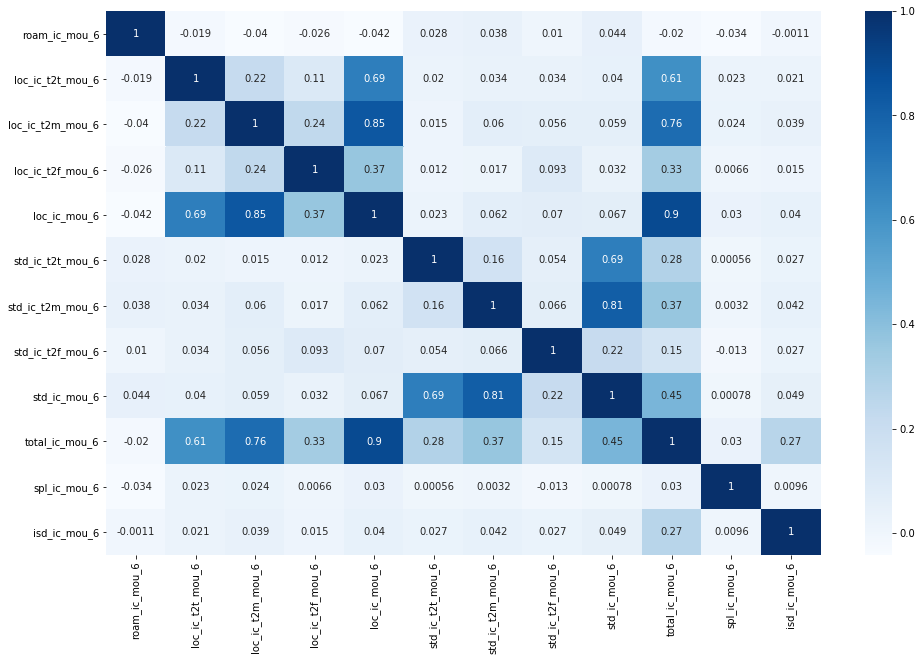

In [85]:
plt.figure(figsize = (16,10))
sns.heatmap(data = high_value_customers[month_6_mou_ic_cols].corr(), annot = True, cmap = "Blues")
plt.show()

`Inference` We can see in the above plot that the columns `total_ic_mou_6` , `std_ic_mou_6` and `loc_ic_mou_6` is having high correlation. Also, there are some other columns showing loc_ic_mou and std_ic_mou.

- Let us Find the correlation between those columns

#### loc_ic_mou

In [79]:
ic_mou_6_cols = high_value_customers.columns[high_value_customers.columns.str.contains('loc_ic.*mou.*6')]
ic_mou_6_cols

Index(['loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6',
       'loc_ic_mou_6'],
      dtype='object')

In [80]:
temp_df = high_value_customers[ic_mou_6_cols]
temp_df['total_loc_ic_calls'] = high_value_customers['loc_ic_t2t_mou_6'] + \
                             high_value_customers['loc_ic_t2m_mou_6'] + \
                             high_value_customers['loc_ic_t2f_mou_6']
temp_df

,loc_ic_t2t_mou_6,loc_ic_t2m_mou_6,loc_ic_t2f_mou_6,loc_ic_mou_6,total_loc_ic_calls
0,0.00,0.00,0.00,0.00,0.00
7,58.14,217.56,152.16,427.88,427.86
8,23.84,57.58,0.00,81.43,81.42
21,2.48,118.23,4.61,125.33,125.32
23,20.71,95.91,0.00,116.63,116.62
...,...,...,...,...,...
99981,285.33,93.36,0.30,378.99,378.99
99984,32.21,53.49,0.00,85.71,85.70
99986,140.71,395.58,29.96,566.26,566.25
99988,47.56,245.31,14.43,307.31,307.30


In [81]:
temp_df[['loc_ic_mou_6', 'total_loc_ic_calls']].describe()

,loc_ic_mou_6,total_loc_ic_calls
count,30001.000000,30001.000000
mean,231.153776,231.144145
std,314.821196,314.819603
min,0.000000,0.000000
25%,47.880000,47.870000
50%,134.490000,134.480000
75%,297.140000,297.130000
max,7454.630000,7454.620000


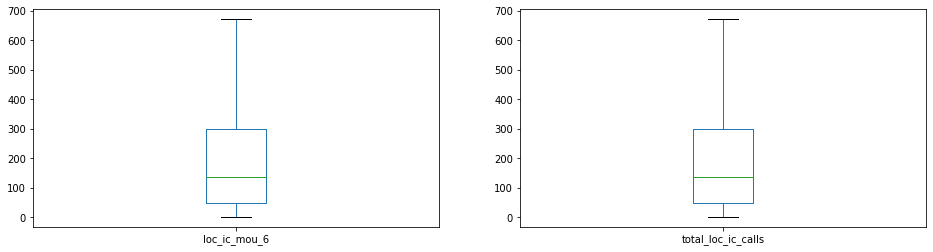

In [82]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
temp_df.loc_ic_mou_6.plot.box(showfliers = False)
plt.subplot(1,2,2)
temp_df.total_loc_ic_calls.plot.box(showfliers = False)
plt.show()

`Inference` It is seen from the above df that `loc_ic_mou_6` = `loc_ic_t2t_mou_6 + loc_ic_t2m_mou_6 + loc_ic_t2f_mou_6`

#### std_ic_mou

In [83]:
ic_mou_6_cols = high_value_customers.columns[high_value_customers.columns.str.contains('std_ic.*mou.*6')]
ic_mou_6_cols

Index(['std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6',
       'std_ic_mou_6'],
      dtype='object')

In [84]:
temp_df = high_value_customers[ic_mou_6_cols]
temp_df['total_std_ic_calls'] = high_value_customers['std_ic_t2t_mou_6'] + \
                             high_value_customers['std_ic_t2m_mou_6'] + \
                             high_value_customers['std_ic_t2f_mou_6']
temp_df

,std_ic_t2t_mou_6,std_ic_t2m_mou_6,std_ic_t2f_mou_6,std_ic_mou_6,total_std_ic_calls
0,0.00,0.00,0.00,0.00,0.00
7,36.89,91.44,52.19,180.54,180.52
8,0.00,22.43,0.00,22.43,22.43
21,14.06,67.69,0.00,81.76,81.75
23,0.51,2.43,0.00,2.94,2.94
...,...,...,...,...,...
99981,57.60,0.00,41.59,99.19,99.19
99984,0.00,2.33,0.99,3.33,3.32
99986,2.31,12.14,0.00,14.46,14.45
99988,10.08,680.34,1.01,691.44,691.43


In [85]:
temp_df[['std_ic_mou_6', 'total_std_ic_calls']].describe()

,std_ic_mou_6,total_std_ic_calls
count,30001.000000,30001.000000
mean,46.789434,46.785849
std,137.501469,137.500276
min,0.000000,0.000000
25%,1.030000,1.030000
50%,11.410000,11.400000
75%,41.490000,41.480000
max,5459.630000,5459.620000


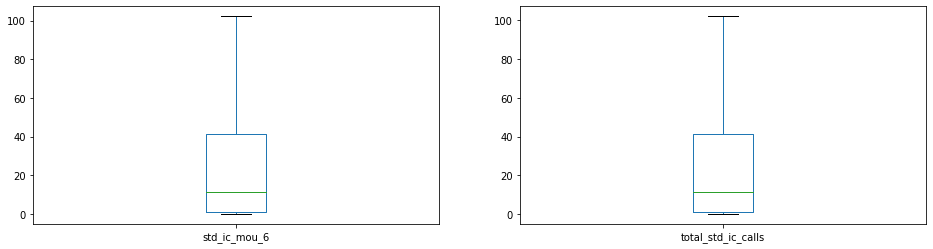

In [86]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
temp_df.std_ic_mou_6.plot.box(showfliers = False)
plt.subplot(1,2,2)
temp_df.total_std_ic_calls.plot.box(showfliers = False)
plt.show()

`Inference` It is seen from the above df that `std_ic_mou_6` = `std_ic_t2t_mou_6 + std_ic_t2m_mou_6 + std_ic_t2f_mou_6`

#### total_ic_mou_6

In [87]:
ic_mou_6 = high_value_customers.columns[high_value_customers.columns.str.contains("ic_mou_6|ic_others_6")]
ic_mou_6

Index(['roam_ic_mou_6', 'loc_ic_mou_6', 'std_ic_mou_6', 'total_ic_mou_6',
       'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6'],
      dtype='object')

In [88]:
# Checking null values in og and ic others
og_ic_others = high_value_customers.columns[high_value_customers.columns.str.contains("others")]
pd.DataFrame(100*high_value_customers[og_ic_others].isnull().sum()/len(high_value_customers))

,0
og_others_6,0.0
og_others_7,0.0
og_others_8,0.0
ic_others_6,0.0
ic_others_7,0.0
ic_others_8,0.0


In [89]:
temp_df = high_value_customers[ic_mou_6]
temp_df['total_ic_mou_calculated_6'] = high_value_customers['roam_ic_mou_6'] + \
                             high_value_customers['loc_ic_mou_6'] + \
                             high_value_customers['std_ic_mou_6'] + \
                             high_value_customers['isd_ic_mou_6'] + \
                             high_value_customers['spl_ic_mou_6'] + \
                             high_value_customers['ic_others_6']
temp_df

,roam_ic_mou_6,loc_ic_mou_6,std_ic_mou_6,total_ic_mou_6,spl_ic_mou_6,isd_ic_mou_6,ic_others_6,total_ic_mou_calculated_6
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
7,16.23,427.88,180.54,626.46,0.21,2.06,15.74,642.66
8,0.00,81.43,22.43,103.86,0.00,0.00,0.00,103.86
21,0.00,125.33,81.76,207.09,0.00,0.00,0.00,207.09
23,0.00,116.63,2.94,119.58,0.00,0.00,0.00,119.57
...,...,...,...,...,...,...,...,...
99981,0.00,378.99,99.19,478.48,0.13,0.00,0.15,478.46
99984,0.00,85.71,3.33,89.48,0.43,0.00,0.00,89.47
99986,0.00,566.26,14.46,580.73,0.00,0.00,0.00,580.72
99988,0.00,307.31,691.44,998.96,0.00,0.00,0.20,998.95


In [90]:
temp_df[['total_ic_mou_6', 'total_ic_mou_calculated_6']].describe()

,total_ic_mou_6,total_ic_mou_calculated_6
count,30001.000000,30001.000000
mean,289.950496,306.052737
std,365.523475,371.928900
min,0.000000,0.000000
25%,72.880000,83.250000
50%,183.730000,200.030000
75%,371.990000,391.990000
max,7716.140000,7716.130000


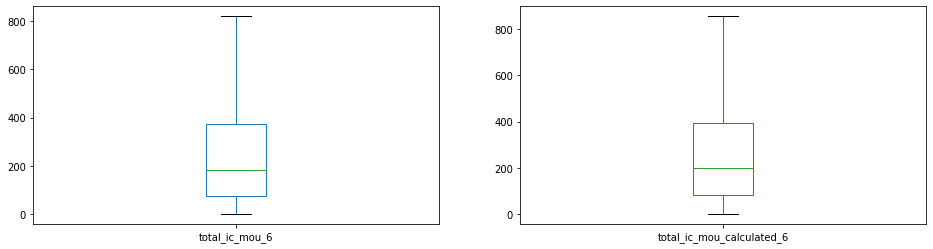

In [91]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
temp_df.total_ic_mou_6.plot.box(showfliers = False)
plt.subplot(1,2,2)
temp_df.total_ic_mou_calculated_6.plot.box(showfliers = False)
plt.show()

`Inference` : Here `total_ic_mou_6` approximately equal to `roam_ic_mou_6 + loc_ic_mou_6 + std_ic_mou_6 + isd_ic_mou_6 + spl_ic_mou_6+ ic_others_6`

- Upon analysing we see that the columns `total_ic_mou , loc_ic_mou and std_ic_mou` can be dropped since it is explained by combination of other columns.

In [92]:
cols = high_value_customers.columns[high_value_customers.columns.str.contains("total_ic_mou|loc_ic_mou|std_ic_mou")]
cols

Index(['loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_6',
       'std_ic_mou_7', 'std_ic_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8'],
      dtype='object')

In [93]:
cols_to_drop

Index(['loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_mou_6',
       'std_og_mou_7', 'std_og_mou_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8'],
      dtype='object')

In [94]:
# Dropping cols_to_drop and cols
high_value_customers.drop(cols_to_drop, axis = 1, inplace = True)

In [95]:
high_value_customers.drop(cols, axis = 1, inplace = True)

In [96]:
# Shape of DataSet after dropping columns
high_value_customers.shape

(30001, 133)

### Offnet Usage

In [97]:
# Filtering offnet Columns
offnet_cols = high_value_customers.columns[high_value_customers.columns.str.contains('offnet')]
offnet_cols

Index(['offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'], dtype='object')

In [98]:
# Checking null values
high_value_customers[offnet_cols].isnull().sum()/len(high_value_customers)

offnet_mou_6    0.0
offnet_mou_7    0.0
offnet_mou_8    0.0
dtype: float64

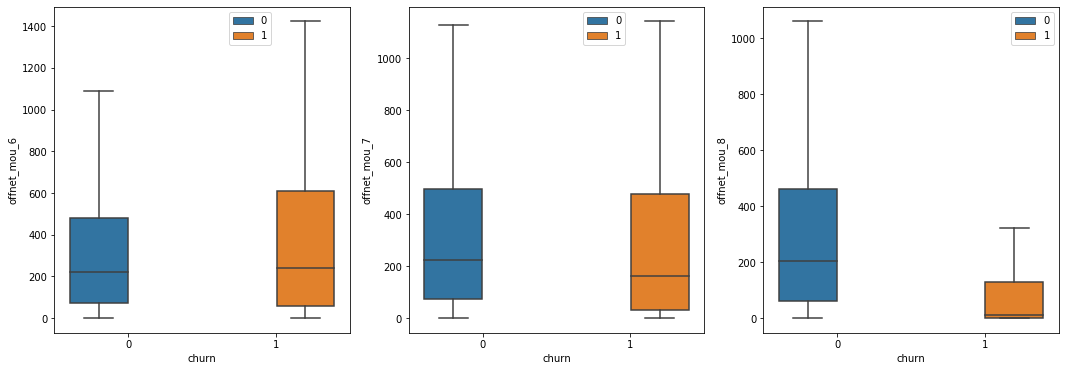

In [99]:
draw_box('offnet_mou')

`Inference` : This shows that All kind of calls made outside of operator T network also drops down for churn customers in active phase

### Onnet Usage

In [100]:
# Filtering offnet Columns
onnet_cols = high_value_customers.columns[high_value_customers.columns.str.contains('onnet')]
onnet_cols

Index(['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8'], dtype='object')

In [101]:
# Checking null values
high_value_customers[onnet_cols].isnull().sum()/len(high_value_customers)

onnet_mou_6    0.0
onnet_mou_7    0.0
onnet_mou_8    0.0
dtype: float64

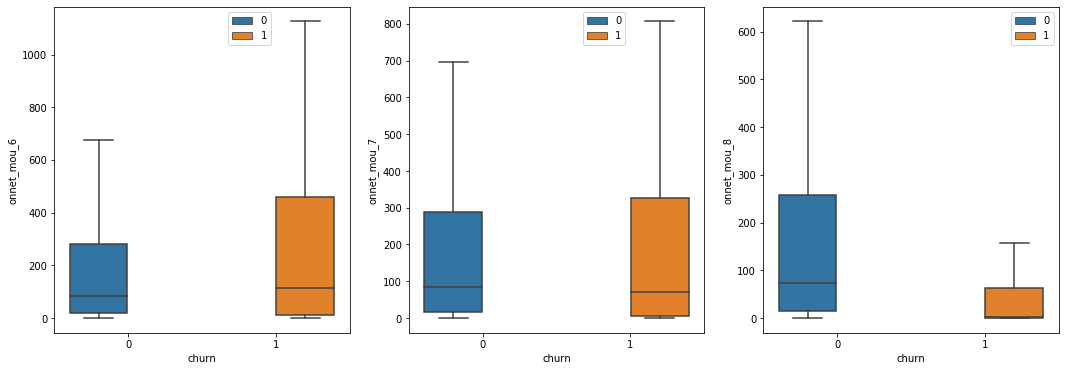

In [102]:
draw_box('onnet_mou')

`Inference` : This shows that All kind of calls made within the operator also drops down for churn customers in active phase

### Age on network - number of days the customer is using the operator T network - AON columns

In [103]:
# Filtering Age on Network columns
high_value_customers.columns[high_value_customers.columns.str.contains('aon')]

Index(['aon'], dtype='object')

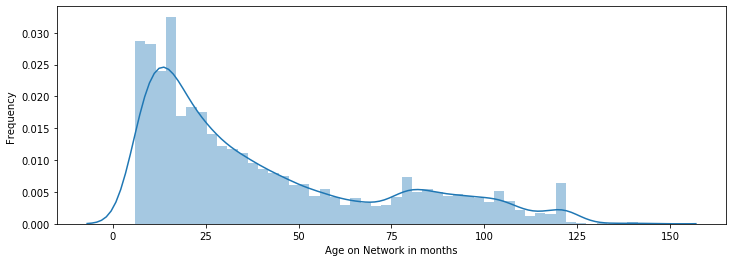

In [104]:
# Distribution Plot of Age on Network Column
plt.figure(figsize = (12,4))
sns.distplot(round(high_value_customers['aon']/30 , 2))
plt.xlabel("Age on Network in months")
plt.ylabel('Frequency ')
plt.show()

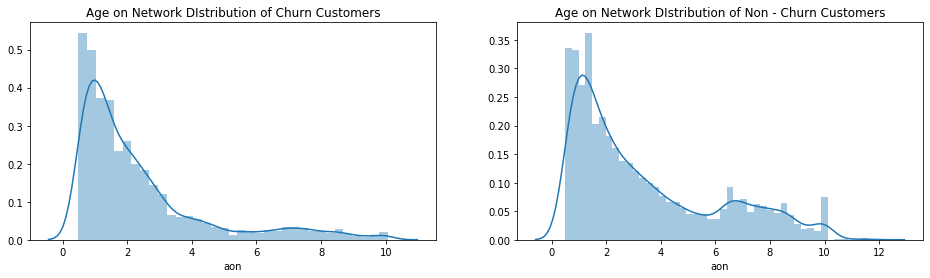

In [105]:
plt.figure(figsize = (16,4))
plt.subplot(1,2,1)
sns.distplot(high_value_customers[high_value_customers.churn == 1].aon/365)
plt.title("Age on Network DIstribution of Churn Customers")
plt.subplot(1,2,2)
sns.distplot(high_value_customers[high_value_customers.churn == 0].aon/365)
plt.title("Age on Network DIstribution of Non - Churn Customers")
plt.show()

In [108]:
labels = ['Less than a year', '1 - 2 years', '2 - 3 years', '3 - 4 years', '4 - 5 years', 'More than 5 years']
bins = [0, 365, 730, 1095, 1460, 1825, 1000000000]

In [111]:
aon_df = high_value_customers.copy()
aon_df['aon_cat'] = pd.cut(x = aon_df.aon, bins = bins, labels = labels)
aon_df.head()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,aon,vbc_3g_8,vbc_3g_7,vbc_3g_6,total_amt_rech_data_6,total_amt_rech_data_7,total_amt_rech_data_8,total_rech_amt_good_phase,churn,aon_cat
0,7000842753,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,...,968,30.40,0.00,101.20,252.0,252.0,252.0,559.0,1,2 - 3 years
7,7000701601,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,...,802,57.74,19.38,18.74,0.0,0.0,0.0,1185.0,1,2 - 3 years
8,7001524846,378.721,492.223,137.362,413.69,351.03,35.08,94.66,80.63,136.48,...,315,21.03,910.65,122.16,0.0,354.0,207.0,696.0,0,Less than a year
21,7002124215,514.453,597.753,637.760,102.41,132.11,85.14,757.93,896.68,983.39,...,720,0.00,0.00,0.00,0.0,0.0,0.0,640.0,0,1 - 2 years
23,7000887461,74.350,193.897,366.966,48.96,50.66,33.58,85.41,89.36,205.89,...,604,40.45,51.86,0.00,0.0,712.0,540.0,583.0,0,1 - 2 years


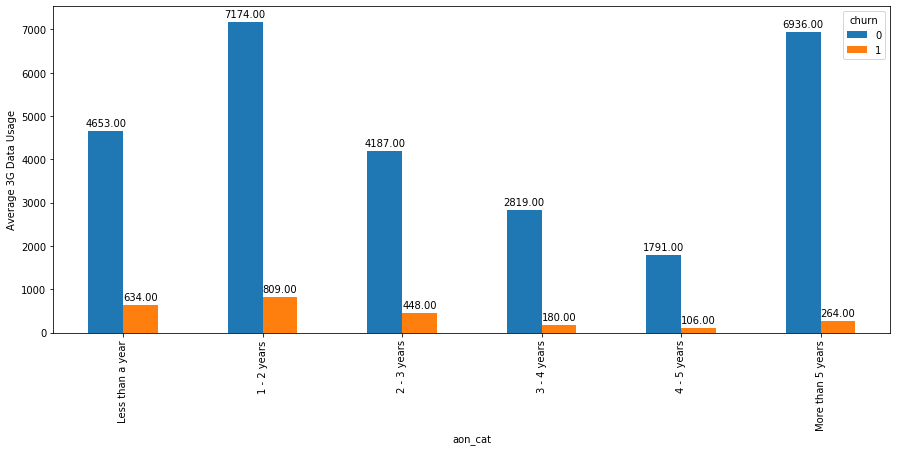

In [129]:
plt1 = pd.pivot_table(data = aon_df, columns = 'aon_cat', values = 'mobile_number', index = 'churn', aggfunc = 'count').T.plot.bar(figsize = (15,6))
for bar in plt1.patches:
        plt1.annotate("{}".format(format(bar.get_height(), '.2f')), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt1.set_ylabel("Average 3G Data Usage")
plt.show()

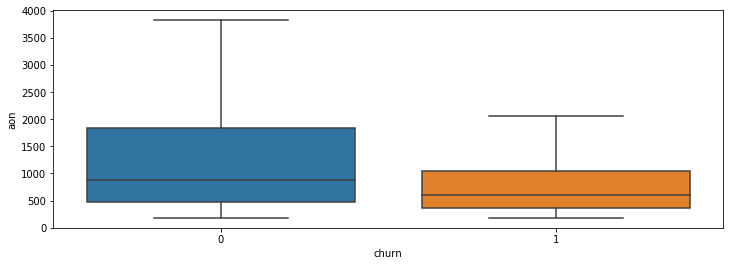

In [112]:
# Distribution of AON based on Churn
plt.figure(figsize = (12,4))
sns.boxplot(data = high_value_customers, x = 'churn', y= 'aon', showfliers = False)
plt.show()

`Inference` : We can see here that the age on network for churn customers are less when compared with non-churn customers

In [130]:
# Selecting date columns
date_columns = high_value_customers.columns[high_value_customers.columns.str.contains("date")]
date_columns

Index(['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8',
       'date_of_last_rech_data_6', 'date_of_last_rech_data_7',
       'date_of_last_rech_data_8'],
      dtype='object')

In [131]:
# Dropping Date columns
high_value_customers.drop(date_columns, axis = 1, inplace = True)

## Null Value Treatment

In [132]:
# Handling null values
null_values = pd.DataFrame(100*high_value_customers.isnull().sum()/len(high_value_customers)).sort_values(by = 0, ascending = False)
null_values[null_values[0] > 30]

,0
night_pck_user_8,46.825106
fb_user_8,46.825106
fb_user_6,44.148528
night_pck_user_6,44.148528
night_pck_user_7,43.145228
fb_user_7,43.145228


In [133]:
# Extracting high null value columns
high_null_cols = null_values[null_values[0] > 30].index
high_null_cols

Index(['night_pck_user_8', 'fb_user_8', 'fb_user_6', 'night_pck_user_6',
       'night_pck_user_7', 'fb_user_7'],
      dtype='object')

In [134]:
high_value_customers[high_null_cols].describe()

,night_pck_user_8,fb_user_8,fb_user_6,night_pck_user_6,night_pck_user_7,fb_user_7
count,15953.000000,15953.000000,16756.000000,16756.000000,17057.000000,17057.000000
mean,0.021375,0.897198,0.926534,0.024290,0.021985,0.921733
std,0.144636,0.303710,0.260908,0.153952,0.146639,0.268599
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
50%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
75%,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- We can see here that nearly 45% of columns in night_pack_user and fb_user. Also, the nearly lot of values are 0. So, dropping this columns

In [135]:
high_value_customers.drop(high_null_cols, axis = 1, inplace = True)

In [136]:
null_values = pd.DataFrame(100*high_value_customers.isnull().sum()/len(high_value_customers)).sort_values(by = 0, ascending = False)
null_values

,0
mobile_number,0.0
std_ic_t2f_mou_6,0.0
max_rech_data_7,0.0
max_rech_data_6,0.0
total_rech_data_8,0.0
...,...
std_og_t2f_mou_8,0.0
std_og_t2f_mou_7,0.0
std_og_t2f_mou_6,0.0
std_og_t2m_mou_8,0.0


In [137]:
# Dropping total_rech_amt_good_phase column
high_value_customers.drop('total_rech_amt_good_phase', axis = 1, inplace = True)

In [138]:
# Combining Columns with _6 and _7 as _G
# Taking average of June and July month as Good Phase columns

# Fetching unique column names without _6 and _7
unique_cols = []
for i in high_value_customers.columns[high_value_customers.columns.str.contains('_6|_7')]:
    val = i.strip('_6').strip('_7')
    unique_cols.append(val)

unique_cols = list(set(unique_cols))
len(unique_cols)

39

In [139]:
# Taking average of _6 and _7 columns and storing in _G

model_df = high_value_customers.copy()
for i in unique_cols:
    col_6 = i + "_6"
    col_7 = i + "_7"
    col_G = i + "_G"
    model_df[col_G] = (model_df[col_6] + model_df[col_7])/2

In [140]:
model_df.shape

(30001, 159)

In [141]:
pd.DataFrame(100*model_df.isnull().sum()/len(model_df)).sort_values(by = 0 , ascending = False)

,0
mobile_number,0.0
sachet_3g_6,0.0
monthly_2g_8,0.0
sachet_2g_6,0.0
sachet_2g_7,0.0
...,...
loc_ic_t2f_mou_8,0.0
std_ic_t2t_mou_6,0.0
std_ic_t2t_mou_7,0.0
std_ic_t2t_mou_8,0.0


In [142]:
# Dropping cols with _6 and _7
cols_6_7 = model_df.columns[model_df.columns.str.contains("_6|_7")]
model_df.drop(cols_6_7, axis = 1, inplace = True)

In [143]:
# CHecking the shape
model_df.shape

(30001, 81)

In [144]:
pd.DataFrame(100*model_df.isnull().sum()/len(model_df)).sort_values(by = 0, ascending = False)

,0
mobile_number,0.0
churn,0.0
vol_3g_mb_G,0.0
vbc_3g_G,0.0
total_rech_data_G,0.0
...,...
total_rech_amt_8,0.0
total_rech_num_8,0.0
ic_others_8,0.0
isd_ic_mou_8,0.0


# Principal Component Analysis

In [145]:
model_pca = model_df.copy()

### Train Test Split

In [146]:
y = model_pca.churn
model_pca.pop('churn')
X = model_pca

In [147]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7, random_state = 101)

In [148]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(21000, 80)
(9001, 80)
(21000,)
(9001,)


In [149]:
X_train.drop('mobile_number', axis = 1, inplace= True)
X_test.drop('mobile_number', axis = 1, inplace = True)

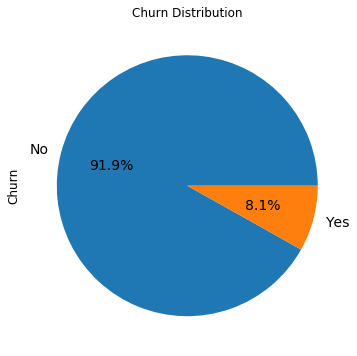

In [150]:
#Churn Distribution
pie_chart = model_df['churn'].value_counts()*100.0 /len(model_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

- We have data imbalance here. Only 8.1% of customers are under class churn

### Scaling of data

In [151]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_cols = X_train.select_dtypes(include = ['int64', 'float64'])
X_train_new = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train_scaled = pd.DataFrame(X_train_new, columns = list(num_cols))

In [152]:
X_train_scaled

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,loc_ic_t2f_mou_G,std_ic_t2t_mou_G,total_rech_amt_G,std_ic_t2m_mou_G,isd_ic_mou_G,vol_2g_mb_G,spl_og_mou_G,std_ic_t2f_mou_G,monthly_3g_G,og_others_G
0,1.576148,3.924350,0.374033,-0.170292,-0.185248,8.476440,1.498725,0.301065,-0.236767,-0.371187,...,0.809466,-0.172217,2.552958,-0.109729,-0.145243,-0.031558,-0.082491,0.603903,1.347220,0.178851
1,-0.523733,-0.481768,-0.588712,-0.170292,-0.185248,-0.288523,-0.426770,-0.292487,-0.236767,-0.371187,...,0.653046,-0.186729,-0.497951,-0.315605,-0.145243,-0.215169,0.075453,-0.147907,-0.387717,0.541181
2,-0.260021,-0.440613,-0.099384,3.360020,1.294316,-0.321362,-0.291943,0.514921,-0.236767,-0.363755,...,-0.291043,-0.156817,-0.207044,-0.018276,-0.080775,0.084835,-0.382826,0.333294,-0.387717,-0.139920
3,1.441333,0.546272,1.297385,-0.170292,-0.185248,1.533960,2.588655,-0.063284,-0.236767,-0.241307,...,0.232956,-0.179740,0.613277,0.001090,-0.145243,-0.268177,0.113444,-0.141209,-0.387717,-0.023103
4,-0.487813,-0.452526,-0.137728,-0.003046,-0.080452,-0.299297,0.162142,-0.292487,-0.235373,-0.331041,...,-0.342328,-0.164043,-0.318167,-0.217051,-0.145243,-0.428235,-0.382826,-0.150854,-0.387717,-0.139920
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20995,-0.961253,-0.504794,-0.693019,-0.170292,-0.185248,-0.334335,-0.641571,-0.292487,-0.236767,-0.371187,...,-0.341771,-0.186729,-0.881008,-0.313991,-0.114147,-0.149070,0.212458,-0.150854,-0.387717,0.044215
20996,-0.557404,-0.500223,-0.566957,0.051913,-0.161878,-0.327051,-0.476669,-0.292487,-0.236767,-0.371187,...,-0.287364,0.042916,-0.565709,0.061127,0.380841,1.490119,-0.131251,0.094301,0.479751,0.238249
20997,-0.461213,-0.481313,-0.611599,-0.170292,-0.185248,-0.287618,-0.476753,-0.262785,-0.225616,-0.371187,...,0.008751,-0.186729,-0.775306,-0.301565,-0.145243,0.035813,-0.258983,-0.150854,-0.387717,-0.139920
20998,-0.783174,-0.474815,-0.617073,-0.170292,-0.185248,-0.298521,-0.486411,-0.292487,-0.194952,-0.357303,...,-0.293719,-0.186729,-0.900884,-0.318726,-0.108488,1.274594,0.375189,-0.088159,-0.387717,-0.139920


In [153]:
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

### Initializing PCA

In [154]:
pca = PCA(random_state= 101)
pca.fit(X_train_scaled)

PCA(random_state=101)

In [155]:
col = list(X_train_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.010159,0.291935,0.162270,arpu_8
1,-0.106284,0.114812,0.145476,onnet_mou_8
2,-0.096972,0.200413,0.116210,offnet_mou_8
3,-0.006106,0.055882,0.008898,roam_ic_mou_8
4,-0.020941,0.072617,0.031118,roam_og_mou_8
5,-0.024641,0.098309,0.024995,loc_og_t2t_mou_8
6,-0.024573,0.173499,-0.022012,loc_og_t2m_mou_8
7,0.013165,0.108289,-0.090819,loc_og_t2f_mou_8
8,-0.012458,0.014148,0.078347,loc_og_t2c_mou_8
9,-0.106159,0.068586,0.150839,std_og_t2t_mou_8


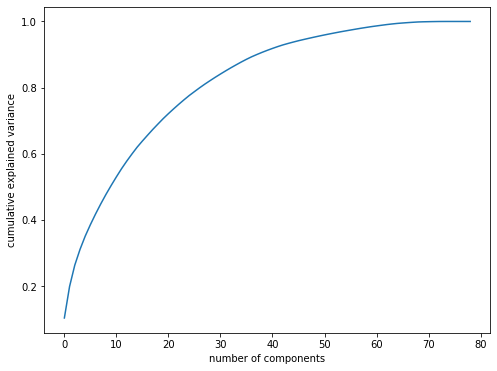

In [156]:
# Draqing Scree Plot
fig = plt.figure(figsize = (8,6))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

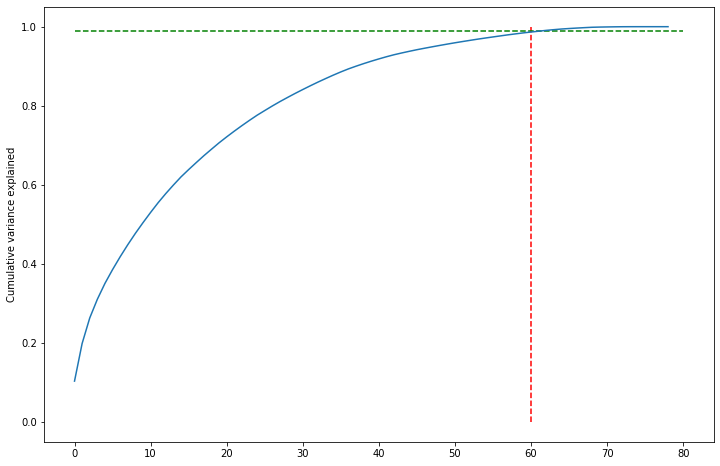

In [157]:
# Selecting number of features
var_cumu = np.cumsum(pca.explained_variance_ratio_)
fig = plt.figure(figsize=[12,8])
plt.vlines(x=60, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.99, xmax=80, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

In [158]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([10.35, 19.87, 26.32, 31.05, 35.07, 38.56, 41.81, 44.86, 47.73,
       50.43, 53.02, 55.5 , 57.79, 59.95, 62.01, 63.85, 65.62, 67.36,
       69.  , 70.62, 72.13, 73.58, 74.98, 76.32, 77.61, 78.79, 79.95,
       81.06, 82.11, 83.13, 84.11, 85.07, 86.  , 86.89, 87.75, 88.57,
       89.34, 90.02, 90.67, 91.28, 91.86, 92.41, 92.92, 93.36, 93.78,
       94.19, 94.56, 94.92, 95.27, 95.61, 95.94, 96.25, 96.56, 96.86,
       97.14, 97.41, 97.68, 97.95, 98.2 , 98.44, 98.65, 98.86, 99.07,
       99.25, 99.41, 99.53, 99.65, 99.75, 99.85, 99.9 , 99.93, 99.96,
       99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

- Nearly 98% of variance is explained by 60 features. So, selecting 60 features

### Synthetic Minority Over-sampling Technique

In [159]:
from imblearn.over_sampling import SMOTE

In [160]:
smote = SMOTE(random_state = 101)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [161]:
in_pca = IncrementalPCA(n_components = 60)

In [162]:
X_train_pca = in_pca.fit_transform(X_smote)

In [163]:
X_test_pca = in_pca.transform(X_test)

In [164]:
X_train_pca.shape

(38578, 60)

# Model Creation

### Logistic Regression

In [165]:
#Training the model on the train data
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

lr = LogisticRegression()
model = lr.fit(X_train_pca,y_smote)

In [166]:
lr.intercept_

array([-0.52198145])

In [167]:
lr.coef_

array([[-0.5957268 , -0.32536777,  0.64147282, -0.11116278,  0.20487612,
         0.98256934,  0.56928871, -0.38227792,  0.3575019 ,  0.14355642,
         0.00166165,  0.35251242, -0.15005106,  0.09716421,  0.08479243,
        -0.01213384, -0.28242005, -0.02768263,  0.06003944,  0.16333117,
         0.07197336, -0.16019287, -0.08730831,  0.15577629, -0.00649524,
         0.04731127,  0.04279391, -0.49568777, -0.59816884,  0.03576727,
         0.29166176, -0.33883463,  0.11543873, -0.13422202, -0.76575928,
        -0.58694351, -0.0935488 ,  0.1223336 ,  0.17722349, -0.19589901,
         0.00152731, -0.49455592, -1.16991631, -0.30792902, -0.30404907,
        -0.21710282, -0.14885054,  0.60743345,  0.14985626, -0.32308504,
         0.5122771 , -0.05519946, -0.07665075,  0.19701686, -0.5406251 ,
        -0.43301121,  0.13881616,  0.2128026 ,  0.13970623,  0.25263444]])

In [168]:
# Calculating Train, test precision, recall, roc auc score and F1 Score
from sklearn import metrics
def score_sheet(X_true, y_true, model , model_name):
    pred_probs_test = model.predict_proba(X_true)[:,1]
    roc_auc_score = metrics.roc_auc_score(y_true, pred_probs_test)
    y_pred = model.predict(X_true)
    accuracy = metrics.accuracy_score(y_true, y_pred)
    recall = metrics.recall_score(y_true, y_pred)
    precision = metrics.precision_score(y_true, y_pred)
    f1_score = metrics.f1_score(y_true, y_pred)
    df = pd.DataFrame({
            "Model Name": [model_name],
            "Accuracy" : [accuracy],
            "Precision" : [precision],
            "Recall" : [recall],
            "F1 Score" : [f1_score],
            "ROC AUC Score" : [roc_auc_score]
        })
    df = df.set_index('Model Name')
    return df

In [169]:
log_train = score_sheet(X_train_pca, y_smote, model, "Logistic Regression - Train")
log_test = score_sheet(X_test_pca, y_test, model, "Logistic Regression - Test")

In [170]:
log_train

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Logistic Regression - Train,0.844626,0.828742,0.868785,0.848292,0.919452


In [171]:
log_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Logistic Regression - Test,0.819131,0.285782,0.820548,0.423921,0.884629


### Random Forest Models

In [172]:
from sklearn.ensemble import RandomForestClassifier

In [173]:
rf = RandomForestClassifier()

In [174]:
rf.fit(X_train_pca, y_smote)

RandomForestClassifier()

In [175]:
rf_bf_tune_train = score_sheet(X_train_pca, y_smote, rf, "Ramdom Forest - Before Hyperparameter Tuning (For Train)")
rf_bf_tune_train

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Ramdom Forest - Before Hyperparameter Tuning (For Train),1.0,1.0,1.0,1.0,1.0


In [176]:
rf_bf_tune_test = score_sheet(X_test_pca, y_test, rf, "Ramdom Forest - Before Hyperparameter Tuning (For Test)")
rf_bf_tune_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Ramdom Forest - Before Hyperparameter Tuning (For Test),0.911454,0.45959,0.521918,0.488775,0.880155


### HyperParameter Tuning

In [177]:
from sklearn.model_selection import GridSearchCV

In [161]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [12,14,16,18],
    'n_estimators': [100, 200],
    'max_features': [20,30,40],
    'min_samples_leaf': [10,20],
    'min_samples_split': [10,20,30]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5, n_jobs = -1,verbose = 1,return_train_score=True, scoring = "accuracy")

In [162]:
%%time
grid_search.fit(X_train_pca, y_smote)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Wall time: 7h 2min 14s


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [12, 14, 16, 18],
                         'max_features': [20, 30, 40],
                         'min_samples_leaf': [10, 20],
                         'min_samples_split': [10, 20, 30],
                         'n_estimators': [100, 200]},
             return_train_score=True, scoring='accuracy', verbose=1)

In [163]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=18, max_features=20, min_samples_leaf=10,
                       min_samples_split=10)

In [166]:
rf_af_tune_train = score_sheet(X_train_pca, y_smote, grid_search.best_estimator_ , "Ramdom Forest - After Hyperparameter Tuning (For Train)")
rf_af_tune_train

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Ramdom Forest - After Hyperparameter Tuning (For Train),0.968946,0.957051,0.981959,0.969345,0.993491


In [164]:
rf_af_tune_test = score_sheet(X_test_pca, y_test, grid_search.best_estimator_ , "Ramdom Forest - After Hyperparameter Tuning (For Test)")
rf_af_tune_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Ramdom Forest - After Hyperparameter Tuning (For Test),0.899122,0.42193,0.658904,0.514439,0.884667


### Setting up final Random Forest model

In [178]:
rf_model = RandomForestClassifier(max_depth=18,
                                  max_features=20,
                                  min_samples_leaf=10,
                                  min_samples_split=10,
                                  n_estimators = 200)

In [179]:
rf_model.fit(X_train_pca, y_smote)

RandomForestClassifier(max_depth=18, max_features=20, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200)

In [180]:
# Getting Score sheet
RF_train = score_sheet(X_train_pca, y_smote, rf_model , "Ramdom Forest - Final Model (For Train)")
RF_train

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Ramdom Forest - Final Model (For Train),0.969827,0.956802,0.984084,0.970251,0.993403


In [181]:
RF_test = score_sheet(X_test_pca, y_test, rf_model , "Ramdom Forest - Final Model (For Test)")
RF_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Ramdom Forest - Final Model (For Test),0.897234,0.415144,0.653425,0.507717,0.885208


# XGBOOST

In [182]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance

In [183]:
xg_model = XGBClassifier()
xg_model.fit(X_train_pca, y_smote)

[17:04:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [184]:
xg_bf_tune_train = score_sheet(X_train_pca, y_smote, xg_model, "XG Boosting - Before Hyperparameter Tuning (For Train)")
xg_bf_tune_train

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
XG Boosting - Before Hyperparameter Tuning (For Train),0.99155,0.984615,0.998704,0.99161,0.999689


In [185]:
xg_bf_tune_test = score_sheet(X_test_pca, y_test, xg_model, "XG Boosting - Before Hyperparameter Tuning (For Test)")
xg_bf_tune_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
XG Boosting - Before Hyperparameter Tuning (For Test),0.898234,0.412921,0.60411,0.490545,0.867211


### Hyper Paramter Tuning

In [174]:
# hyperparameter tuning of XGBoost model

# specify range of hyperparameters
params = {'learning_rate': [0.1,0.2,0.3], 
             'subsample': [0.3,0.4,0.5],
         'max_depth' : [2,3,4,5,6]}          


# specify model
xgb_model = XGBClassifier(n_estimators=200)

# set up GridSearchCV()
xgb_cv = GridSearchCV(estimator = xgb_model, 
                        param_grid = params, 
                        scoring= 'accuracy', # accuracy
                        cv = 5, 
                        n_jobs = -1,
                        verbose = 3,
                        return_train_score=True)      



In [175]:
%%time
xgb_cv.fit(X_train_pca, y_smote)

Fitting 5 folds for each of 45 candidates, totalling 225 fits
[11:08:59] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Wall time: 49min 45s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     enable_categorical=False, gamma=None,
                                     gpu_id=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight

In [177]:
xgb_model = xgb_cv.best_estimator_

In [182]:
xgb_model

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

# XG Boosting Final Model

In [189]:
xgb_model = XGBClassifier(learning_rate=0.3,
              max_depth=6, n_estimators=200, subsample=0.5)

In [190]:
xgb_model.fit(X_train_pca, y_smote)

[17:07:30] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.0/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.3, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=200, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.5,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [191]:
xgb_train = score_sheet(X_train_pca, y_smote, xgb_model , "XG Boosting (For Train)")
xgb_train

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
XG Boosting (For Train),0.999922,0.999844,1.0,0.999922,1.0


In [192]:
xgb_test = score_sheet(X_test_pca, y_test, xgb_model , "XG Boosting (For Test)")
xgb_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
XG Boosting (For Test),0.905122,0.432314,0.542466,0.481166,0.870567


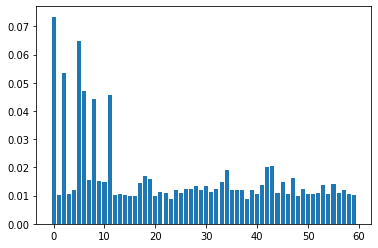

In [193]:
plt.bar(range(len(xgb_model.feature_importances_)), xgb_model.feature_importances_)
plt.show()

## Final Score Sheet (Considated Models)

In [194]:
pd.concat([log_test, RF_test, xgb_test])

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Logistic Regression - Test,0.819131,0.285782,0.820548,0.423921,0.884629
Ramdom Forest - Final Model (For Test),0.897234,0.415144,0.653425,0.507717,0.885208
XG Boosting (For Test),0.905122,0.432314,0.542466,0.481166,0.870567


# Checking Important Features

### Using PCA

In [195]:
col = list(X_train_scaled.columns)
df_pca = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'PC3':pca.components_[2],'Feature':col})
df_pca.head(10)

,PC1,PC2,PC3,Feature
0,0.010159,0.291935,0.162270,arpu_8
1,-0.106284,0.114812,0.145476,onnet_mou_8
2,-0.096972,0.200413,0.116210,offnet_mou_8
3,-0.006106,0.055882,0.008898,roam_ic_mou_8
4,-0.020941,0.072617,0.031118,roam_og_mou_8
5,-0.024641,0.098309,0.024995,loc_og_t2t_mou_8
6,-0.024573,0.173499,-0.022012,loc_og_t2m_mou_8
7,0.013165,0.108289,-0.090819,loc_og_t2f_mou_8
8,-0.012458,0.014148,0.078347,loc_og_t2c_mou_8
9,-0.106159,0.068586,0.150839,std_og_t2t_mou_8


### Using Random Forests

In [196]:
# Over Sampling of Train Data to handle churn class imbalance
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 101)
X_smote, y_smote = smote.fit_resample(X_train_scaled, y_train)

In [197]:
resample_df = X_smote.copy()
resample_df['churn'] = y_smote
resample_df.head()

,arpu_8,onnet_mou_8,offnet_mou_8,roam_ic_mou_8,roam_og_mou_8,loc_og_t2t_mou_8,loc_og_t2m_mou_8,loc_og_t2f_mou_8,loc_og_t2c_mou_8,std_og_t2t_mou_8,...,std_ic_t2t_mou_G,total_rech_amt_G,std_ic_t2m_mou_G,isd_ic_mou_G,vol_2g_mb_G,spl_og_mou_G,std_ic_t2f_mou_G,monthly_3g_G,og_others_G,churn
0,1.576148,3.924350,0.374033,-0.170292,-0.185248,8.476440,1.498725,0.301065,-0.236767,-0.371187,...,-0.172217,2.552958,-0.109729,-0.145243,-0.031558,-0.082491,0.603903,1.347220,0.178851,0
1,-0.523733,-0.481768,-0.588712,-0.170292,-0.185248,-0.288523,-0.426770,-0.292487,-0.236767,-0.371187,...,-0.186729,-0.497951,-0.315605,-0.145243,-0.215169,0.075453,-0.147907,-0.387717,0.541181,0
2,-0.260021,-0.440613,-0.099384,3.360020,1.294316,-0.321362,-0.291943,0.514921,-0.236767,-0.363755,...,-0.156817,-0.207044,-0.018276,-0.080775,0.084835,-0.382826,0.333294,-0.387717,-0.139920,0
3,1.441333,0.546272,1.297385,-0.170292,-0.185248,1.533960,2.588655,-0.063284,-0.236767,-0.241307,...,-0.179740,0.613277,0.001090,-0.145243,-0.268177,0.113444,-0.141209,-0.387717,-0.023103,0
4,-0.487813,-0.452526,-0.137728,-0.003046,-0.080452,-0.299297,0.162142,-0.292487,-0.235373,-0.331041,...,-0.164043,-0.318167,-0.217051,-0.145243,-0.428235,-0.382826,-0.150854,-0.387717,-0.139920,0


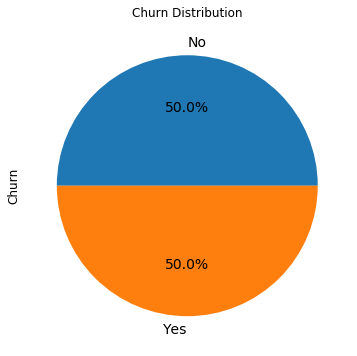

In [198]:
#Churn Distribution
pie_chart = resample_df['churn'].value_counts()*100.0 /len(resample_df)
ax = pie_chart.plot.pie(autopct='%.1f%%', labels = ['No', 'Yes'],figsize =(8,6), fontsize = 14 )                                                                           
ax.set_ylabel('Churn',fontsize = 12)
ax.set_title('Churn Distribution', fontsize = 12)
plt.show()

## Building Random Forest Model

In [199]:
from sklearn.ensemble import RandomForestClassifier

In [200]:
# Using the best estimator parameters
RF = RandomForestClassifier(max_depth=18,
                                  max_features=20,
                                  min_samples_leaf=10,
                                  min_samples_split=10,
                                  n_estimators = 200)

In [201]:
RF.fit(X_smote, y_smote)

RandomForestClassifier(max_depth=18, max_features=20, min_samples_leaf=10,
                       min_samples_split=10, n_estimators=200)

In [202]:
RF_scores = score_sheet(X_smote, y_smote, RF , "Random Forest")
RF_scores

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Random Forest,0.970087,0.961521,0.979366,0.970362,0.995286


In [203]:
RF_scores_test = score_sheet(X_test, y_test, RF , "Random Forest")
RF_scores_test

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Random Forest,0.919342,0.501946,0.706849,0.587031,0.914691


In [204]:
feat_importance = pd.DataFrame({"Features" : RF.feature_names_in_ , "Importance" : RF.feature_importances_}).sort_values(by = 'Importance', ascending = False)
feat_importance

,Features,Importance
16,loc_ic_t2m_mou_8,0.135780
6,loc_og_t2m_mou_8,0.080779
25,total_rech_amt_8,0.080494
4,roam_og_mou_8,0.080401
0,arpu_8,0.066704
...,...,...
36,sachet_3g_8,0.000860
33,monthly_2g_8,0.000652
11,std_og_t2f_mou_8,0.000614
35,monthly_3g_8,0.000561


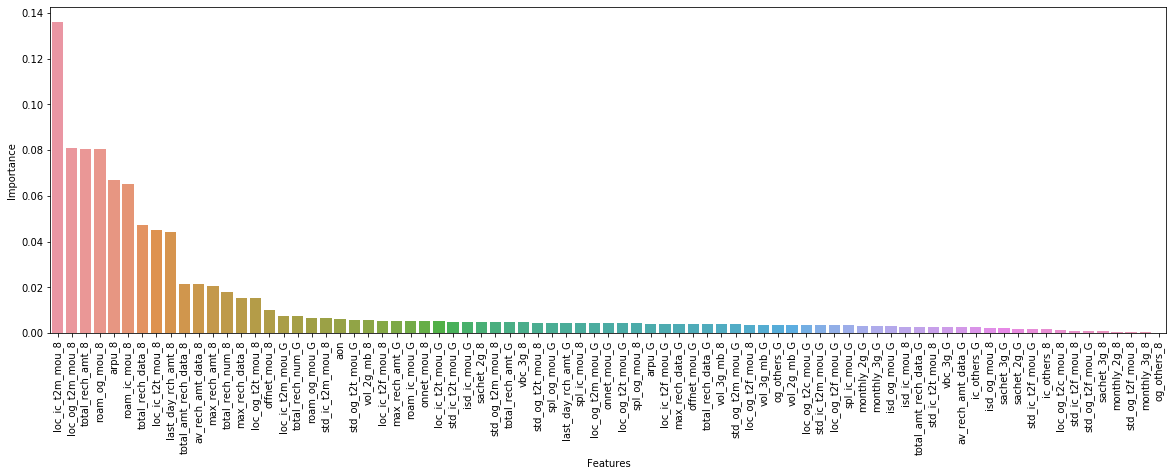

In [205]:
plt.figure(figsize = (20,6))
sns.barplot(data= feat_importance, x= 'Features', y= 'Importance')
plt.xticks(rotation=90)
plt.show()

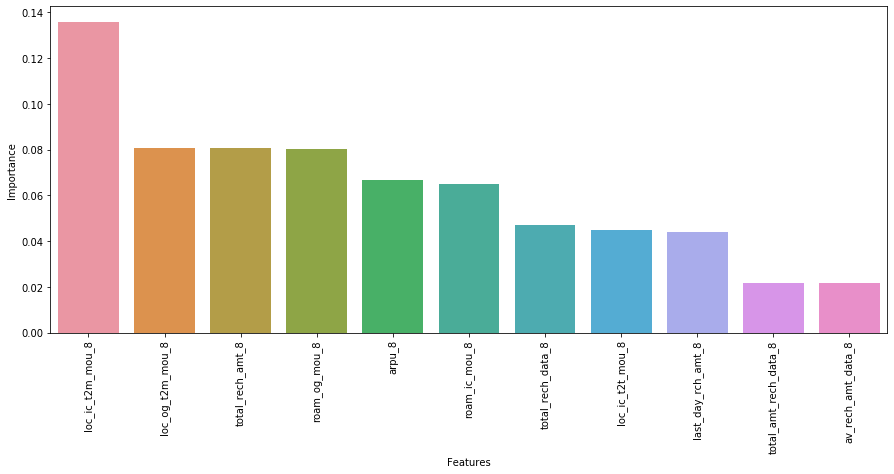

In [206]:
# Plotting top 10 Features
plt.figure(figsize = (15,6))
sns.barplot(data= feat_importance[:11], x= 'Features', y= 'Importance')
plt.xticks(rotation=90)
plt.show()

### Feature Importance using Logistic Regression

In [207]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [208]:
lr_model = LogisticRegression()

In [209]:
rfe = RFE(lr_model)
rfe = rfe.fit(X_smote, y_smote)

In [210]:
list(zip(X_smote.columns, rfe.support_, rfe.ranking_))

[('arpu_8', True, 1),
 ('onnet_mou_8', False, 32),
 ('offnet_mou_8', True, 1),
 ('roam_ic_mou_8', False, 39),
 ('roam_og_mou_8', True, 1),
 ('loc_og_t2t_mou_8', True, 1),
 ('loc_og_t2m_mou_8', False, 14),
 ('loc_og_t2f_mou_8', False, 23),
 ('loc_og_t2c_mou_8', False, 19),
 ('std_og_t2t_mou_8', False, 2),
 ('std_og_t2m_mou_8', True, 1),
 ('std_og_t2f_mou_8', True, 1),
 ('isd_og_mou_8', False, 41),
 ('spl_og_mou_8', False, 18),
 ('og_others_8', True, 1),
 ('loc_ic_t2t_mou_8', True, 1),
 ('loc_ic_t2m_mou_8', True, 1),
 ('loc_ic_t2f_mou_8', True, 1),
 ('std_ic_t2t_mou_8', True, 1),
 ('std_ic_t2m_mou_8', True, 1),
 ('std_ic_t2f_mou_8', False, 12),
 ('spl_ic_mou_8', True, 1),
 ('isd_ic_mou_8', False, 10),
 ('ic_others_8', False, 11),
 ('total_rech_num_8', True, 1),
 ('total_rech_amt_8', True, 1),
 ('max_rech_amt_8', True, 1),
 ('last_day_rch_amt_8', True, 1),
 ('total_rech_data_8', True, 1),
 ('max_rech_data_8', True, 1),
 ('av_rech_amt_data_8', False, 7),
 ('vol_2g_mb_8', True, 1),
 ('vol_3

In [211]:
col = X_smote.columns[rfe.support_]

In [212]:
import statsmodels.api as sm

In [213]:
X_train_sm = sm.add_constant(X_smote[col])
logm2 = sm.GLM(y_smote, X_train_sm , family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38578
Model:                            GLM   Df Residuals:                    38538
Model Family:                Binomial   Df Model:                           39
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14262.
Date:                Tue, 30 Nov 2021   Deviance:                       28525.
Time:                        17:12:15   Pearson chi2:                 6.85e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3148      0.035    -66.710      0.000      -2.383      -2.247
arpu_8                    0.3789      0.080      4.721      0.000       0.222       0.536
offnet_mou_8             -1.1224      0.095    -11.776      0.000      -1.309      -0.936
roam_og_mou_8             0.2489      0.022     11.251      0.000       0.206       0.292
loc_og_t2t_mou_8         -0.5141      0.072     -7.145      0.000      -0.655      -0.373
std_og_t2m_mou_8          0.8349      0.081     10.337      0.000       0.677       0.993
std_og_t2f_mou_8         -0.3535      0.058     -6.070      0.000      -0.468      -0.239
og_others_8              -0.9354      0.322     -2.909      0.004      -1.566      -0.305
loc_ic_t2t_mou_8         -1.1313      0.095    -11.962      0.000      -1.317      -0.946
loc_ic_t2m_mou_8         -1.6700      0.080    -20.991      0.000      -1.826      -1.514
loc_ic_t2f_mou_8         -0.6549      0.068     -9.610      0.000      -0.788      -0.521
std_ic_t2t_mou_8         -0.7337      0.068    -10.821      0.000      -0.867      -0.601
std_ic_t2m_mou_8         -0.2237      0.035     -6.323      0.000      -0.293      -0.154
spl_ic_mou_8             -0.8140      0.046    -17.746      0.000      -0.904      -0.724
total_rech_num_8         -0.4080      0.028    -14.404      0.000      -0.464      -0.352
total_rech_amt_8         -1.0337      0.082    -12.579      0.000      -1.195      -0.873
max_rech_amt_8            0.3519      0.029     12.224      0.000       0.295       0.408
last_day_rch_amt_8       -0.4935      0.026    -19.217      0.000      -0.544      -0.443
total_rech_data_8        -0.7689      0.101     -7.640      0.000      -0.966      -0.572
max_rech_data_8          -0.3251      0.031    -10.449      0.000      -0.386      -0.264
vol_2g_mb_8              -0.3099      0.037     -8.444      0.000      -0.382      -0.238
monthly_2g_8             -0.1828      0.032     -5.654      0.000      -0.246      -0.119
sachet_2g_8              -0.3152      0.083     -3.793      0.000      -0.478      -0.152
aon                      -0.3178      0.019    -16.671      0.000      -0.355      -0.280
vbc_3g_8                 -0.3185      0.034     -9.443      0.000      -0.385      -0.252
total_amt_rech_data_8     0.2401      0.058      4.166      0.000       0.127       0.353
arpu_G                    0.7138      0.033     21.436      0.000       0.649       0.779
loc_ic_t2t_mou_G          0.3942      0.058      6.771      0.000       0.280       0.508
max_rech_data_G           0.2563      0.039      6.512      0.000       0.179       0.333
std_og_t2t_mou_G          0.8509      0.194      4.384      0.000       0.471       1.231
total_rech_data_G         0.2529      0.030      8.307      0.000       0.193       0.313
onnet_mou_G            

In [214]:
# Checking Multicollinearity using VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
30,onnet_mou_G,198.12
28,std_og_t2t_mou_G,167.61
35,loc_og_t2t_mou_G,39.47
14,total_rech_amt_8,19.40
0,arpu_8,17.94
17,total_rech_data_8,14.65
21,sachet_2g_8,8.91
1,offnet_mou_8,8.79
4,std_og_t2m_mou_8,6.40
33,av_rech_amt_data_G,5.80


Removing `onnet_mou_G` since it has high VIF

#### Model 2

In [215]:
col = col.drop('onnet_mou_G', 1)
X_train_sm = sm.add_constant(X_smote[col])
logm2 = sm.GLM(y_smote, X_train_sm , family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38578
Model:                            GLM   Df Residuals:                    38539
Model Family:                Binomial   Df Model:                           38
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14273.
Date:                Tue, 30 Nov 2021   Deviance:                       28547.
Time:                        17:12:41   Pearson chi2:                 5.01e+05
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.3097      0.035    -66.610      0.000      -2.378      -2.242
arpu_8                    0.3761      0.080      4.692      0.000       0.219       0.533
offnet_mou_8             -1.0255      0.092    -11.184      0.000      -1.205      -0.846
roam_og_mou_8             0.2544      0.022     11.325      0.000       0.210       0.298
loc_og_t2t_mou_8         -0.5237      0.073     -7.212      0.000      -0.666      -0.381
std_og_t2m_mou_8          0.7570      0.078      9.720      0.000       0.604       0.910
std_og_t2f_mou_8         -0.3565      0.058     -6.132      0.000      -0.470      -0.243
og_others_8              -0.9415      0.322     -2.920      0.003      -1.573      -0.310
loc_ic_t2t_mou_8         -1.1381      0.095    -12.010      0.000      -1.324      -0.952
loc_ic_t2m_mou_8         -1.6972      0.080    -21.274      0.000      -1.854      -1.541
loc_ic_t2f_mou_8         -0.6540      0.068     -9.600      0.000      -0.788      -0.521
std_ic_t2t_mou_8         -0.7319      0.068    -10.799      0.000      -0.865      -0.599
std_ic_t2m_mou_8         -0.2191      0.035     -6.226      0.000      -0.288      -0.150
spl_ic_mou_8             -0.8124      0.046    -17.746      0.000      -0.902      -0.723
total_rech_num_8         -0.4098      0.028    -14.557      0.000      -0.465      -0.355
total_rech_amt_8         -1.0348      0.081    -12.700      0.000      -1.195      -0.875
max_rech_amt_8            0.3503      0.029     12.239      0.000       0.294       0.406
last_day_rch_amt_8       -0.4892      0.026    -19.064      0.000      -0.539      -0.439
total_rech_data_8        -0.7544      0.100     -7.544      0.000      -0.950      -0.558
max_rech_data_8          -0.3221      0.031    -10.374      0.000      -0.383      -0.261
vol_2g_mb_8              -0.3117      0.037     -8.481      0.000      -0.384      -0.240
monthly_2g_8             -0.1834      0.032     -5.679      0.000      -0.247      -0.120
sachet_2g_8              -0.3265      0.083     -3.947      0.000      -0.489      -0.164
aon                      -0.3204      0.019    -16.828      0.000      -0.358      -0.283
vbc_3g_8                 -0.3197      0.034     -9.472      0.000      -0.386      -0.254
total_amt_rech_data_8     0.2374      0.057      4.181      0.000       0.126       0.349
arpu_G                    0.7120      0.033     21.324      0.000       0.647       0.777
loc_ic_t2t_mou_G          0.3947      0.058      6.777      0.000       0.281       0.509
max_rech_data_G           0.2548      0.039      6.482      0.000       0.178       0.332
std_og_t2t_mou_G         -0.0717      0.016     -4.420      0.000      -0.103      -0.040
total_rech_data_G         0.2543      0.030      8.358      0.000       0.195       0.314
loc_og_t2f_mou_G       

In [216]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,total_rech_amt_8,19.40
0,arpu_8,17.94
17,total_rech_data_8,14.65
21,sachet_2g_8,8.91
1,offnet_mou_8,8.64
4,std_og_t2m_mou_8,6.32
32,av_rech_amt_data_G,5.80
27,max_rech_data_G,5.65
18,max_rech_data_8,3.24
8,loc_ic_t2m_mou_8,3.21


### Model 3

In [217]:
col = col.drop('total_rech_amt_8', 1)
X_train_sm = sm.add_constant(X_smote[col])
logm2 = sm.GLM(y_smote, X_train_sm , family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38578
Model:                            GLM   Df Residuals:                    38540
Model Family:                Binomial   Df Model:                           37
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14353.
Date:                Tue, 30 Nov 2021   Deviance:                       28707.
Time:                        17:12:54   Pearson chi2:                 2.26e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2779      0.034    -66.475      0.000      -2.345      -2.211
arpu_8                   -0.4228      0.046     -9.120      0.000      -0.514      -0.332
offnet_mou_8             -1.0073      0.091    -11.047      0.000      -1.186      -0.829
roam_og_mou_8             0.2441      0.023     10.838      0.000       0.200       0.288
loc_og_t2t_mou_8         -0.5208      0.072     -7.209      0.000      -0.662      -0.379
std_og_t2m_mou_8          0.7282      0.077      9.405      0.000       0.576       0.880
std_og_t2f_mou_8         -0.3239      0.057     -5.659      0.000      -0.436      -0.212
og_others_8              -0.9577      0.314     -3.047      0.002      -1.574      -0.342
loc_ic_t2t_mou_8         -1.1766      0.095    -12.409      0.000      -1.362      -0.991
loc_ic_t2m_mou_8         -1.6965      0.080    -21.307      0.000      -1.853      -1.540
loc_ic_t2f_mou_8         -0.6428      0.067     -9.551      0.000      -0.775      -0.511
std_ic_t2t_mou_8         -0.7248      0.067    -10.758      0.000      -0.857      -0.593
std_ic_t2m_mou_8         -0.2123      0.035     -6.066      0.000      -0.281      -0.144
spl_ic_mou_8             -0.8066      0.046    -17.569      0.000      -0.897      -0.717
total_rech_num_8         -0.4967      0.029    -17.022      0.000      -0.554      -0.439
max_rech_amt_8            0.2333      0.028      8.393      0.000       0.179       0.288
last_day_rch_amt_8       -0.5120      0.026    -19.638      0.000      -0.563      -0.461
total_rech_data_8        -0.7746      0.101     -7.706      0.000      -0.972      -0.578
max_rech_data_8          -0.2983      0.031     -9.609      0.000      -0.359      -0.237
vol_2g_mb_8              -0.3080      0.037     -8.404      0.000      -0.380      -0.236
monthly_2g_8             -0.1978      0.032     -6.152      0.000      -0.261      -0.135
sachet_2g_8              -0.2949      0.084     -3.529      0.000      -0.459      -0.131
aon                      -0.3078      0.019    -16.271      0.000      -0.345      -0.271
vbc_3g_8                 -0.3019      0.033     -9.046      0.000      -0.367      -0.236
total_amt_rech_data_8     0.2257      0.059      3.849      0.000       0.111       0.341
arpu_G                    0.6480      0.033     19.879      0.000       0.584       0.712
loc_ic_t2t_mou_G          0.4043      0.058      6.947      0.000       0.290       0.518
max_rech_data_G           0.2384      0.039      6.082      0.000       0.162       0.315
std_og_t2t_mou_G         -0.0747      0.016     -4.548      0.000      -0.107      -0.042
total_rech_data_G         0.2249      0.030      7.404      0.000       0.165       0.284
loc_og_t2f_mou_G         -0.2462      0.044     -5.629      0.000      -0.332      -0.160
monthly_2g_G           

In [218]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,total_rech_data_8,14.65
20,sachet_2g_8,8.91
1,offnet_mou_8,8.60
4,std_og_t2m_mou_8,6.31
31,av_rech_amt_data_G,5.80
26,max_rech_data_G,5.65
0,arpu_8,4.38
17,max_rech_data_8,3.24
8,loc_ic_t2m_mou_8,3.21
23,total_amt_rech_data_8,2.95


### Model  4 - Removing `total_rech_data_8` Column

In [219]:
col = col.drop('total_rech_data_8', 1)
X_train_sm = sm.add_constant(X_smote[col])
logm2 = sm.GLM(y_smote, X_train_sm , family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                38578
Model:                            GLM   Df Residuals:                    38541
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14384.
Date:                Tue, 30 Nov 2021   Deviance:                       28768.
Time:                        17:13:05   Pearson chi2:                 3.15e+06
No. Iterations:                     9                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.2974      0.035    -66.103      0.000      -2.366      -2.229
arpu_8                   -0.4301      0.046     -9.251      0.000      -0.521      -0.339
offnet_mou_8             -1.0058      0.091    -11.013      0.000      -1.185      -0.827
roam_og_mou_8             0.2427      0.023     10.784      0.000       0.199       0.287
loc_og_t2t_mou_8         -0.5187      0.072     -7.215      0.000      -0.660      -0.378
std_og_t2m_mou_8          0.7346      0.078      9.474      0.000       0.583       0.887
std_og_t2f_mou_8         -0.3266      0.058     -5.670      0.000      -0.439      -0.214
og_others_8              -0.9757      0.321     -3.038      0.002      -1.605      -0.346
loc_ic_t2t_mou_8         -1.1834      0.095    -12.463      0.000      -1.369      -0.997
loc_ic_t2m_mou_8         -1.7098      0.080    -21.443      0.000      -1.866      -1.554
loc_ic_t2f_mou_8         -0.6601      0.068     -9.756      0.000      -0.793      -0.528
std_ic_t2t_mou_8         -0.7242      0.067    -10.745      0.000      -0.856      -0.592
std_ic_t2m_mou_8         -0.2123      0.035     -6.072      0.000      -0.281      -0.144
spl_ic_mou_8             -0.8074      0.046    -17.599      0.000      -0.897      -0.717
total_rech_num_8         -0.5149      0.029    -17.601      0.000      -0.572      -0.458
max_rech_amt_8            0.2444      0.028      8.778      0.000       0.190       0.299
last_day_rch_amt_8       -0.5217      0.026    -19.909      0.000      -0.573      -0.470
max_rech_data_8          -0.3506      0.031    -11.409      0.000      -0.411      -0.290
vol_2g_mb_8              -0.3234      0.037     -8.739      0.000      -0.396      -0.251
monthly_2g_8             -0.2379      0.032     -7.486      0.000      -0.300      -0.176
sachet_2g_8              -0.8221      0.043    -19.065      0.000      -0.907      -0.738
aon                      -0.3074      0.019    -16.278      0.000      -0.344      -0.270
vbc_3g_8                 -0.3144      0.034     -9.279      0.000      -0.381      -0.248
total_amt_rech_data_8    -0.1596      0.071     -2.235      0.025      -0.300      -0.020
arpu_G                    0.6578      0.033     20.186      0.000       0.594       0.722
loc_ic_t2t_mou_G          0.4049      0.058      6.952      0.000       0.291       0.519
max_rech_data_G           0.2453      0.039      6.236      0.000       0.168       0.322
std_og_t2t_mou_G         -0.0709      0.016     -4.311      0.000      -0.103      -0.039
total_rech_data_G         0.1760      0.029      6.007      0.000       0.119       0.233
loc_og_t2f_mou_G         -0.2507      0.044     -5.691      0.000      -0.337      -0.164
monthly_2g_G             -0.3309      0.026    -12.787      0.000      -0.382      -0.280
av_rech_amt_data_G     

In [220]:
vif = pd.DataFrame()
vif['Features'] = X_smote[col].columns
vif['VIF'] = [variance_inflation_factor(X_smote[col].values, i) for i in range(X_smote[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,8.59
4,std_og_t2m_mou_8,6.31
30,av_rech_amt_data_G,5.79
25,max_rech_data_G,5.65
0,arpu_8,4.37
8,loc_ic_t2m_mou_8,3.20
16,max_rech_data_8,3.09
14,max_rech_amt_8,2.94
3,loc_og_t2t_mou_8,2.78
32,loc_og_t2t_mou_G,2.65


Making this model 4 as final as VIF is less than 10 for all features and p-value is less than 0.005 for all features

In [221]:
# Prediction Probabilities
y_train_pred_probs = res.predict(X_train_sm)

In [222]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [223]:
fpr, tpr, thresholds = metrics.roc_curve( y_smote, y_train_pred_probs, drop_intermediate = False )

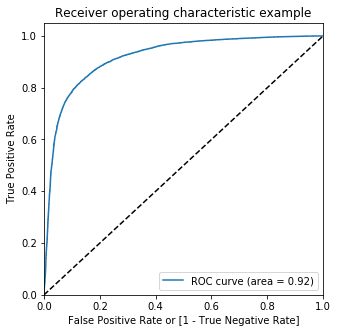

In [224]:
draw_roc(y_smote, y_train_pred_probs)

In [225]:
y_train_pred_final = pd.DataFrame({"Churn": y_smote, "Churn_Probs": y_train_pred_probs})
y_train_pred_final

,Churn,Churn_Probs
0,0,0.001858
1,0,0.046976
2,0,0.675190
3,0,0.001912
4,0,0.357138
...,...,...
38573,1,0.928839
38574,1,0.525217
38575,1,0.909308
38576,1,0.875117


In [226]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Probs.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Churn,Churn_Probs,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.001858,1,0,0,0,0,0,0,0,0,0
1,0,0.046976,1,0,0,0,0,0,0,0,0,0
2,0,0.675190,1,1,1,1,1,1,1,0,0,0
3,0,0.001912,1,0,0,0,0,0,0,0,0,0
4,0,0.357138,1,1,1,1,0,0,0,0,0,0


In [227]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.728680  0.976567  0.480792
0.2   0.2  0.780937  0.956244  0.605630
0.3   0.3  0.810695  0.931152  0.690238
0.4   0.4  0.831381  0.904609  0.758152
0.5   0.5  0.842967  0.869148  0.816787
0.6   0.6  0.845845  0.823267  0.868422
0.7   0.7  0.838846  0.763648  0.914044
0.8   0.8  0.807455  0.664628  0.950283
0.9   0.9  0.639795  0.294105  0.985484


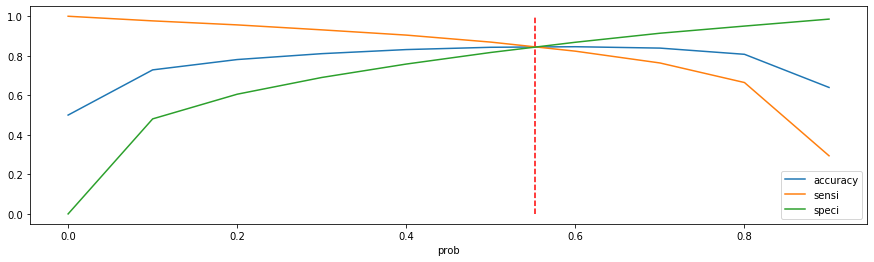

In [228]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'], figsize = (15,4))
plt.vlines(x=0.552, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

#### From the above curve it is seen that the optimal cut off is 0.555

In [229]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Probs.map( lambda x: 1 if x > 0.555 else 0)
y_train_pred_final.head()

,Churn,Churn_Probs,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.001858,1,0,0,0,0,0,0,0,0,0,0
1,0,0.046976,1,0,0,0,0,0,0,0,0,0,0
2,0,0.675190,1,1,1,1,1,1,1,0,0,0,1
3,0,0.001912,1,0,0,0,0,0,0,0,0,0,0
4,0,0.357138,1,1,1,1,0,0,0,0,0,0,0


In [230]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8446264710456737

In [231]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[16319,  2970],
       [ 3024, 16265]], dtype=int64)

In [232]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8455939693267481

In [233]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.8432267095235626

In [234]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Probs)

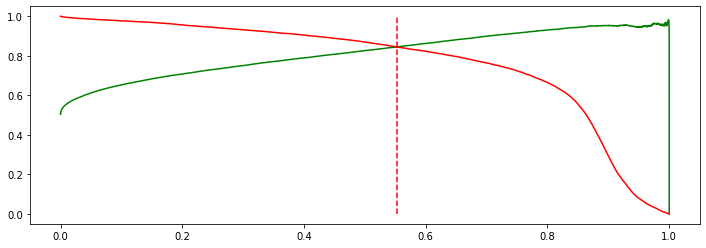

In [235]:
plt.figure(figsize = (12,4))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.vlines(x=0.552, ymax=1, ymin=0, colors="r", linestyles="--")
plt.show()

## Making predictions on test

In [236]:
X_test_scaled = pd.DataFrame(X_test, columns = list(num_cols))

In [237]:
X_test_sm = sm.add_constant(X_test_scaled[col])

In [238]:
y_test_pred = res.predict(X_test_sm)

In [239]:
y_test.shape

(9001,)

In [240]:
y_test_pred.shape

(9001,)

In [241]:
y_test_pred_df = pd.DataFrame({"Churn": list(y_test), "Churn_Probs": list(y_test_pred)})
y_test_pred_df

,Churn,Churn_Probs
0,0,2.911171e-02
1,0,1.598455e-03
2,1,9.932351e-01
3,0,4.627823e-01
4,0,1.705462e-02
...,...,...
8996,0,1.860231e-07
8997,0,1.553014e-02
8998,0,4.507711e-01
8999,0,2.012369e-01


In [242]:
y_test_pred_df['Churn_Probs'] = round(y_test_pred_df.Churn_Probs, 4)

In [243]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Churn_Probs.map( lambda x: 1 if x > 0.555 else 0)
y_test_pred_df.head()

,Churn,Churn_Probs,final_predicted
0,0,0.0291,0
1,0,0.0016,0
2,1,0.9932,1
3,0,0.4628,0
4,0,0.0171,0


In [244]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_test_pred_df.Churn, y_test_pred_df.final_predicted)

0.8409065659371181

In [245]:
confusion2 = metrics.confusion_matrix(y_test_pred_df.Churn, y_test_pred_df.final_predicted )
confusion2

array([[6978, 1293],
       [ 139,  591]], dtype=int64)

## Feature Importances

In [246]:
feat_imp = pd.DataFrame(res.params).rename(columns = {0: "Feature Importances"})
feat_imp['Absolute Importances'] = abs(feat_imp['Feature Importances'])
feat_imp.reset_index(inplace= True)
feat_imp = feat_imp.rename(columns = {'index' : "Features"})
feat_imp = feat_imp.sort_values(by = 'Absolute Importances', ascending = False)
feat_imp.drop(0, inplace = True)
feat_imp

,Features,Feature Importances,Absolute Importances
9,loc_ic_t2m_mou_8,-1.709807,1.709807
8,loc_ic_t2t_mou_8,-1.183353,1.183353
2,offnet_mou_8,-1.005806,1.005806
7,og_others_8,-0.975663,0.975663
20,sachet_2g_8,-0.822080,0.822080
13,spl_ic_mou_8,-0.807394,0.807394
5,std_og_t2m_mou_8,0.734596,0.734596
11,std_ic_t2t_mou_8,-0.724192,0.724192
10,loc_ic_t2f_mou_8,-0.660143,0.660143
24,arpu_G,0.657782,0.657782


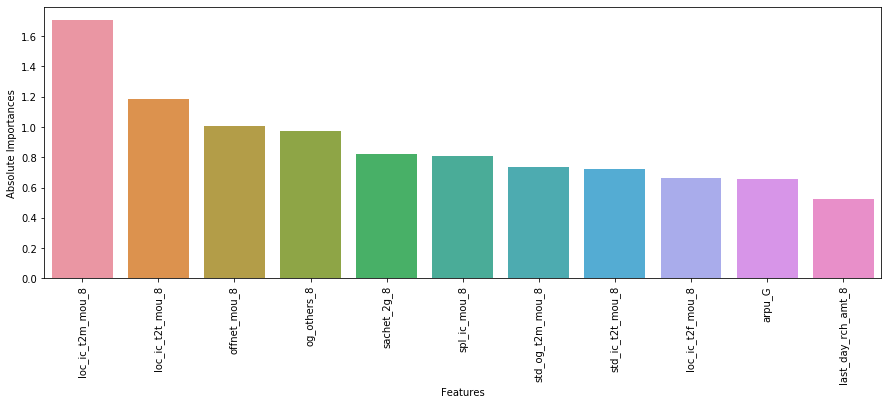

In [247]:
plt.figure(figsize = (15,5))
sns.barplot(data = feat_imp[0:11], x = 'Features', y = 'Absolute Importances')
plt.xticks(rotation = 90)
plt.show()

In [248]:
feat_importance[:11]['Features'].values

array(['loc_ic_t2m_mou_8', 'loc_og_t2m_mou_8', 'total_rech_amt_8',
       'roam_og_mou_8', 'arpu_8', 'roam_ic_mou_8', 'total_rech_data_8',
       'loc_ic_t2t_mou_8', 'last_day_rch_amt_8', 'total_amt_rech_data_8',
       'av_rech_amt_data_8'], dtype=object)

In [249]:
feat_imp[:11]['Features'].values

array(['loc_ic_t2m_mou_8', 'loc_ic_t2t_mou_8', 'offnet_mou_8',
       'og_others_8', 'sachet_2g_8', 'spl_ic_mou_8', 'std_og_t2m_mou_8',
       'std_ic_t2t_mou_8', 'loc_ic_t2f_mou_8', 'arpu_G',
       'last_day_rch_amt_8'], dtype=object)

## Top 10 Important Features

### Based on Random Forest and Logistic regression models, consolidating the top important features.
### Selecting Top 5 features from both the models

- loc_ic_t2m_mou_8
- loc_ic_t2t_mou_8
- arpu_8
- total_rech_amt_8
- roam_og_mou_8
- roam_ic_mou_8
- loc_og_t2m_mou_8
- last_day_rch_amt_8
- offnet_mou_8
- og_others_8
- sachet_2g_8

# Business Recomendations

In [250]:
pd.concat([RF_scores_test, log_test, xgb_test,RF_test])

,Accuracy,Precision,Recall,F1 Score,ROC AUC Score
Model Name,,,,,
Random Forest,0.919342,0.501946,0.706849,0.587031,0.914691
Logistic Regression - Test,0.819131,0.285782,0.820548,0.423921,0.884629
XG Boosting (For Test),0.905122,0.432314,0.542466,0.481166,0.870567
Ramdom Forest - Final Model (For Test),0.897234,0.415144,0.653425,0.507717,0.885208


In [292]:
accuracy_scores_test = {
                   "Random Forest without PCA" : 0.92,
                   "Logistic Regression with PCA" : 0.82,
                   "Logistic regression without PCA" : 0.84,
                   "XG Boosting with PCA" : 0.91,
                   "Random Forest with PCA" : 0.90
                  }
accuracy_scores_train = {
                   "Random Forest without PCA" : 0.97,
                   "Logistic Regression with PCA" : 0.845,
                   "Logistic regression without PCA" : 0.845,
                   "XG Boosting with PCA" : 0.99,
                   "Random Forest with PCA" : 0.97
                  }
acc_df = pd.DataFrame({"Train Accuracy": accuracy_scores_train, "Test Accuracy" : accuracy_scores_test})
acc_df

,Train Accuracy,Test Accuracy
Random Forest without PCA,0.970,0.92
Logistic Regression with PCA,0.845,0.82
Logistic regression without PCA,0.845,0.84
XG Boosting with PCA,0.990,0.91
Random Forest with PCA,0.970,0.90


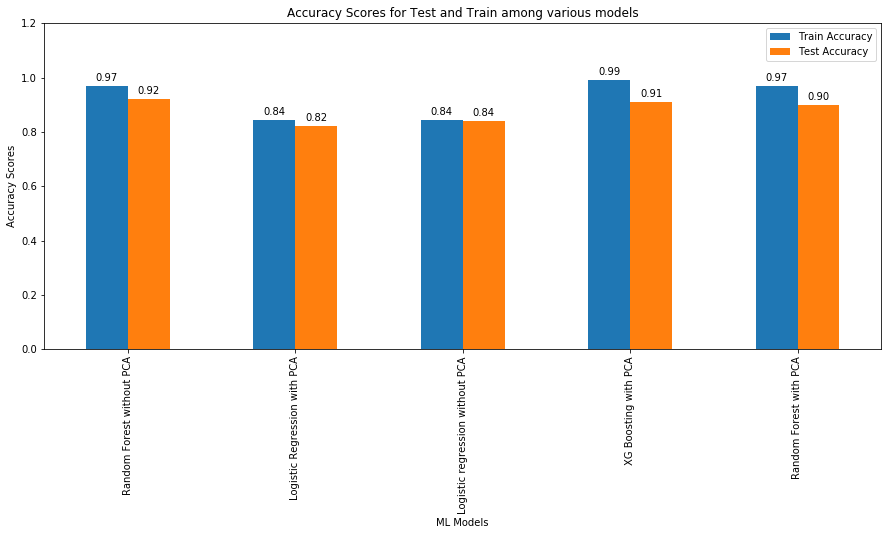

In [302]:
plt1 = acc_df.plot.bar(figsize = (15,6))
for bar in plt1.patches:
        plt1.annotate("{}".format(format(bar.get_height(), '.2f')), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
plt.ylim(0,1.2)
plt.title("Accuracy Scores for Test and Train among various models")
plt.legend(loc = "upper right")
plt.xlabel("ML Models")
plt.ylabel("Accuracy Scores")
plt.show()

- Comparing above models, ensemble model - `Random Forests` and Boosting model - `XGradient Boosting` works well in the classification problem with approximately same accuracy scores.
- So, we can choose any Bagging or Boosting algorithm (`either Random Forest or XG Boosting`)

# Recommendations to Business

- It is seen that those high value customers having age on network less than 2 years are churning the most. So, the client can focus more on these customers.
- Also, features of OG Calls made by the customers in the `ACTIVE PHASE` also seen as top most features.
- `Average revenue per user - arpu` in the month of August also been on the top predictors of churn. So, we can focus on high value customers whose average revenue is low with some fascianting discounts.
- Also, Data recharged on month 8 also influencing churn factor, So we have to focus on making 2G/3G network connectivity available to all high value customer residing areas.